# TASK 2 : UNEMPLOYMENT ANALYSIS WITH PYTHON

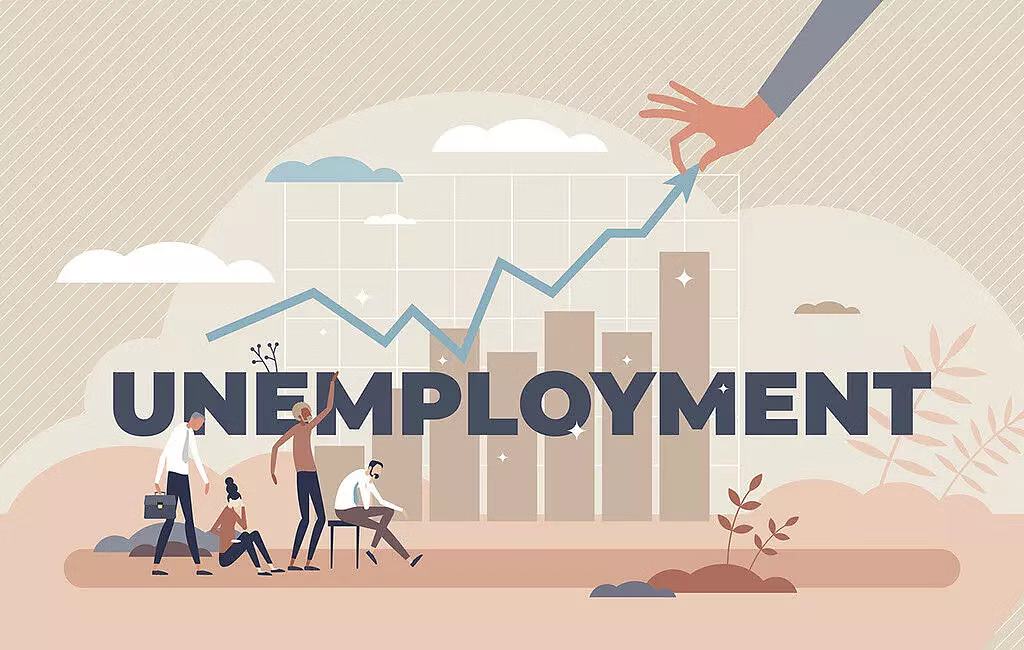

## Task Description

- Unemployment is measured by the unemployment rate which is the number of people who are unemployed as a percentage of the total labour force. 
- We have seen a sharp increase in the unemployment rate during Covid-19, so analyzing the unemployment rate can be a good data science project. 

## About the Dataset

The provided **Unemployment in India** Dataset [link](https://www.kaggle.com/datasets/gokulrajkmv/unemployment-in-india) delves into the unemployment landscape across diverse states in India. The story behind this dataset is how lock-down affects employment opportunities and how the unemployment rate increases during the Covid-19 for different states in India for last one year. Within the dataset, vital indicators including State-wise breakdown, timeline, measurement frequency, Estimated Unemployment Rate (%), Estimated Employed Individuals, Estimated Labour Participation Rate (%) and Area are encompassed. These columns are briefed as follows:

- Region: Various states constituting the Indian subcontinent.
- Date: The specific dates of unemployment rate recordings.
- Frequency: The regularity of measurement collection (Monthly).
- Estimated Unemployment Rate (%): The proportion of unemployed individuals in each Indian state.
- Estimated Employed Individuals: The tally of presently engaged individuals.
- Estimated Labour Participation Rate (%): The percentage of the working-age populace (16-64 years) actively involved in the job market, including both employed individuals and those actively seeking jobs.
- Area: Employment and unemployment rates in Urban and rural areas.

This dataset serves as a valuable resource for comprehending the unemployment variations across India's states throughout the COVID-19 pandemic. By offering crucial insights, it illuminates the repercussions on unemployment rates, employment numbers, and labor participation proportions in distinct geographical regions across the nation. 

## Project Outline

1. [Problem Statement](#Problem_Statement)
2. [Objective](#Objective)
3. [Importing Necessary Libraries and Loading Data](#Importing)
4. [Data Information and Understanding the Data](#Data_Information)
5. [Data Preprocessing](#Data_Preprocessing)
6. [Data Cleaning](#Data_Cleaning)
7. [Exploratory data analysis(EDA)](#EDA)
8. [Data Visualisation](#Data_Visualization)
    - [Month-Wise Visualization](#Month-Wise)
    - [State-Wise Analysis](#State-Wise)
    - [Area-Wise Analysis](#Area-Wise)
    - [Area-State Analysis](#Area-State)
    - [Year-Wise Visualization](#Year-Wise)
    - [Impact of COVID-19 Lockdown in Unemployment Rate in India](#COVID-19)
9. [Summary](#Summary)
10. [Conclusion](#Conclusion)

## Problem Statement <a id="Problem_Statement"></a>

Unemployment, a critical economic indicator, is typically quantified using the unemployment rate, which represents the proportion of individuals without employment within the total labor force. The COVID-19 pandemic has significantly impacted the global labor market, resulting in a substantial surge in the unemployment rate. Analyzing and comprehending the dynamics of this economic metric through data science can offer valuable insights and potential solutions.

## Objective <a id="Objective"></a>

- The primary goal of this project is to perform a comprehensive analysis of unemployment using Python. This analysis aims to shed light on the factors contributing to changes in the unemployment rate, identify patterns, and generate actionable recommendations to address unemployment challenges.
- The analysis aims to provide insights into the pandemic's socio-economic effects on India's workforce and labor arena.

## Importing Necessary Libraries and Loading Data<a id="Importing"></a>

In [1]:
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.ticker import MaxNLocator
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

# Import the 'calendar' and 'datetime' module
import calendar
import datetime as dt

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')

Loading our dataset into a pandas dataframe to manipulate and analyse it.

In [2]:
# load the data from csv file to Pandas DataFrame

df = pd.read_csv(r'C:\Users\BINDU MADHURI\Desktop\OIBSIP\UNEMPLOYMENT ANALYSIS WITH PYTHON\Unemployment in India.csv')

## Data Information and Understanding the Data:<a id="Data_Information"></a>

In [3]:
def data_info(df,head=5):
    print(55*"-" + "Data Size".center(20) + 55*"-")
    print(f'Data Size: {df.size}')
    print("\n" + 55*"-" + "Data Shape".center(20) + 55*"-")
    print(f'\nThe dataframe consists of {df.shape[0]} rows and {df.shape[1]} columns')
    print("\n" + 50*"-" + "The first 5 rows of data".center(30) + 50*"-")
    print(df.head())
    print("\n" + 50 * "-" + "The last 5 rows of data".center(30) + 50 * "-")
    print(df.tail())
    print("\n" + 40*"-" + "Listing all the columns in the dataframe".center(50) + 40*"-")
    print(df.columns)
    print("\n" + 40*"-" + "Total number of unique values in each column".center(50) + 40*"-")
    print(df.nunique())
    print("\n" + 45*"-" + "Information about the dataframe".center(40) + 45*"-")
    print(df.info())
    print("\n" + 35 * "-" + "Checking Statistical Summary for numeric columns".center(60) + 35 * "-")
    print(df.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99]).round(2))
    print("\n" + 40 * "-" + "Checking Statistical Summary for all columns".center(55) + 40 * "-")
    print(df.describe([0.01, 0.05, 0.10, 0.50, 0.75, 0.90, 0.95, 0.99], include='all').round(2))
    
data_info(df)

-------------------------------------------------------     Data Size      -------------------------------------------------------
Data Size: 5376

-------------------------------------------------------     Data Shape     -------------------------------------------------------

The dataframe consists of 768 rows and 7 columns

--------------------------------------------------   The first 5 rows of data   --------------------------------------------------
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)

#### Understanding the data:

- There are 768 rows and 7 columns in the provided dataset.
- The dataset consists of 7 columns, namely - Region, Date, Frequency, Estimated Unemployment Rate (%), Estimated Employed, Estimated Labour Participation Rate (%), and Area.
- The dataset comprises of 3 numerical columns: Estimated Unemployment Rate (%), Estimated Employed and Estimated Labour Participation Rate (%).
- While listing few records of data, we found that there are null values in the dataset. We have to check the count of missing values and missing value percentage to handle them to avoid data inconsistencies, errors, and even database damage. 
- We can observe that the Date feature is having data-type of object which is not correct. So we have to update it. But other features are having the correct Data-Types.

### Data Preprocessing: Checking duplicates in the dataframe <a id="Data_Preprocessing"></a>

In [4]:
df.duplicated().sum()

27

**Observation:** We can clearly observe that there are 27 duplicate values present in our dataset.

In [5]:
#Displaying the duplicate columns
df[df.duplicated()]

Region  Date  Frequency   Estimated Unemployment Rate (%)  \
360    NaN   NaN        NaN                               NaN   
361    NaN   NaN        NaN                               NaN   
362    NaN   NaN        NaN                               NaN   
363    NaN   NaN        NaN                               NaN   
364    NaN   NaN        NaN                               NaN   
365    NaN   NaN        NaN                               NaN   
366    NaN   NaN        NaN                               NaN   
367    NaN   NaN        NaN                               NaN   
368    NaN   NaN        NaN                               NaN   
369    NaN   NaN        NaN                               NaN   
370    NaN   NaN        NaN                               NaN   
371    NaN   NaN        NaN                               NaN   
372    NaN   NaN        NaN                               NaN   
754    NaN   NaN        NaN                               NaN   
755    NaN   NaN        NaN                               NaN   
756    NaN   NaN        NaN                               NaN   
757    NaN   NaN        NaN                               NaN   
758    NaN   NaN        NaN                               NaN   
759    NaN   NaN        NaN                               NaN   
760    NaN   NaN        NaN                               NaN   
761    NaN   NaN        NaN                               NaN   
762    NaN   NaN        NaN                               NaN   
763    NaN   NaN        NaN                               NaN   
764    NaN   NaN        NaN                               NaN   
765    NaN   NaN        NaN                               NaN   
766    NaN   NaN        NaN                               NaN   
767    NaN   NaN        NaN                               NaN   

      Estimated Employed   Estimated Labour Participation Rate (%) Area  
360                  NaN                                       NaN  NaN  
361                  NaN                                       NaN  NaN  
362                  NaN                                       NaN  NaN  
363                  NaN                                       NaN  NaN  
364                  NaN                                       NaN  NaN  
365                  NaN                                       NaN  NaN  
366                  NaN                                       NaN  NaN  
367                  NaN                                       NaN  NaN  
368                  NaN                                       NaN  NaN  
369                  NaN                                       NaN  NaN  
370                  NaN                                       NaN  NaN  
371                  NaN                                       NaN  NaN  
372                  NaN                                       NaN  NaN  
754                  NaN                                       NaN  NaN  
755                  NaN                                       NaN  NaN  
756                  NaN                                       NaN  NaN  
757                  NaN                                       NaN  NaN  
758                  NaN                                       NaN  NaN  
759                  NaN                                       NaN  NaN  
760                  NaN                                       NaN  NaN  
761                  NaN                                       NaN  NaN  
762                  NaN                                       NaN  NaN  
763                  NaN                                       NaN  NaN  
764                  NaN                                       NaN  NaN  
765                  NaN                                       NaN  NaN  
766                  NaN                                       NaN  NaN  
767                  NaN                                       NaN  NaN

**Observation:** We can clearly observe that all the 27 duplicate values present in our dataset are NULL values. So, we can check for all the null values in the dataset and remove them.

### Data Preprocessing: Checking null values and its percentage

In [6]:
# Checking null values in the dataframe
def missing_values_percent(dataframe):
    missing_values = dataframe.isna().sum()
    percentage_missing = (missing_values / len(dataframe) * 100).round(2)

    result_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': percentage_missing})
    result_df['Percentage'] = result_df['Percentage'].astype(str) + '%'

    return result_df


result = missing_values_percent(df)
result

Missing Values Percentage
Region                                                28      3.65%
 Date                                                 28      3.65%
 Frequency                                            28      3.65%
 Estimated Unemployment Rate (%)                      28      3.65%
 Estimated Employed                                   28      3.65%
 Estimated Labour Participation Rate (%)              28      3.65%
Area                                                  28      3.65%

**Observation:** We can observe that there are equal number of missing values in all the columns of our dataset. We can drop the null values.

### Data Preprocessing: Visualization of missing values

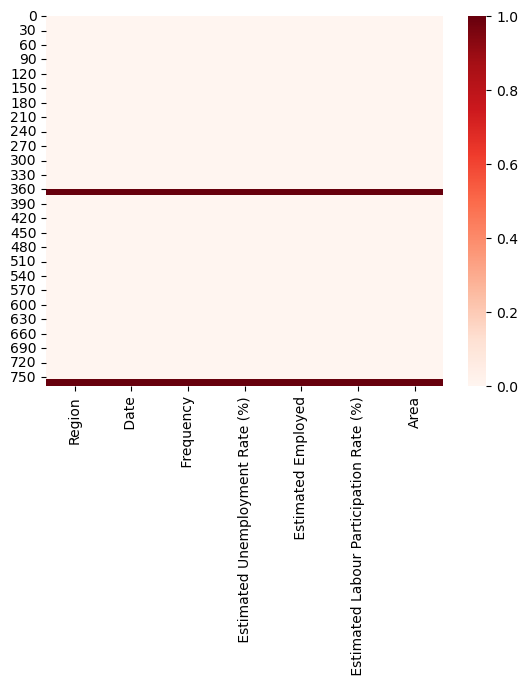

In [7]:
sns.heatmap(df.isnull(),cmap="Reds");

### Data Preprocessing: Handling the null values

In [8]:
#Dropping null values 
df = df.dropna()
df.shape

(740, 7)

**Observation:** We can observe that all null values present in our dataset are dropped. Now, we have 740 observations and 7 features.

### Check Numeric and Categorical columns in the dataframe

In [9]:
# Listing all the Numerical columns and categorical columns in the dataframe
num_list = df.select_dtypes(include='number').columns.tolist()
obj_list = df.select_dtypes(include='object').columns.tolist()
print(f'\nNumerical columns in the dataframe: {num_list}')
print(f'\nObject columns in the dataframe: {obj_list}')


Numerical columns in the dataframe: [' Estimated Unemployment Rate (%)', ' Estimated Employed', ' Estimated Labour Participation Rate (%)']

Object columns in the dataframe: ['Region', ' Date', ' Frequency', 'Area']


### Check unique values in each column of the dataframe

In [10]:
# Displaying the total number of unique values in each column
for i in df:
    print("No. of unique values in %s column are: %s" % (i, df[i].nunique()))

No. of unique values in Region column are: 28
No. of unique values in  Date column are: 14
No. of unique values in  Frequency column are: 2
No. of unique values in  Estimated Unemployment Rate (%) column are: 624
No. of unique values in  Estimated Employed column are: 740
No. of unique values in  Estimated Labour Participation Rate (%) column are: 626
No. of unique values in Area column are: 2


### Check unique values in each categorical column of the dataframe

In [11]:
# print unique values in each categorical columns:
print(f"Unique Values for categorical columns:")
for col in df.select_dtypes(include='object'):
  print(f"  - {col}: {df[col].unique()}\n")

Unique Values for categorical columns:
  - Region: ['Andhra Pradesh' 'Assam' 'Bihar' 'Chhattisgarh' 'Delhi' 'Goa' 'Gujarat'
 'Haryana' 'Himachal Pradesh' 'Jammu & Kashmir' 'Jharkhand' 'Karnataka'
 'Kerala' 'Madhya Pradesh' 'Maharashtra' 'Meghalaya' 'Odisha' 'Puducherry'
 'Punjab' 'Rajasthan' 'Sikkim' 'Tamil Nadu' 'Telangana' 'Tripura'
 'Uttar Pradesh' 'Uttarakhand' 'West Bengal' 'Chandigarh']

  -  Date: [' 31-05-2019' ' 30-06-2019' ' 31-07-2019' ' 31-08-2019' ' 30-09-2019'
 ' 31-10-2019' ' 30-11-2019' ' 31-12-2019' ' 31-01-2020' ' 29-02-2020'
 ' 31-03-2020' ' 30-04-2020' ' 31-05-2020' ' 30-06-2020']

  -  Frequency: [' Monthly' 'Monthly']

  - Area: ['Rural' 'Urban']



### Check the Region counts

In [12]:
df['Region'].value_counts()

Region
Andhra Pradesh      28
Kerala              28
West Bengal         28
Uttar Pradesh       28
Tripura             28
Telangana           28
Tamil Nadu          28
Rajasthan           28
Punjab              28
Odisha              28
Madhya Pradesh      28
Maharashtra         28
Karnataka           28
Jharkhand           28
Himachal Pradesh    28
Haryana             28
Gujarat             28
Delhi               28
Chhattisgarh        28
Bihar               28
Meghalaya           27
Uttarakhand         27
Assam               26
Puducherry          26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
Name: count, dtype: int64

### Check the Area counts

In [13]:
df['Area'].value_counts()

Area
Urban    381
Rural    359
Name: count, dtype: int64

### Check the Date counts

In [14]:
df[' Date'].value_counts()

 Date
 31-10-2019    55
 30-11-2019    55
 31-05-2019    54
 30-06-2019    54
 31-07-2019    54
 31-08-2019    53
 31-12-2019    53
 31-01-2020    53
 29-02-2020    53
 30-09-2019    52
 31-03-2020    52
 30-04-2020    51
 31-05-2020    51
 30-06-2020    50
Name: count, dtype: int64

**Observation:** We can clearly observe that Date column name have extra space. So we have to remove it.

### Check the Frequency counts

In [15]:
df[' Frequency'].value_counts()

 Frequency
Monthly     381
 Monthly    359
Name: count, dtype: int64

**Observation:** We can clearly observe that Frequency column name have extra space. Also, both the value counts of Frequency column have same value but there is extra space in monthly. So, we have to remove the white space to get the exact count.  

## Data Cleaning<a id="Data_Cleaning"></a>

Transforming row data into usable formats to ensure data is accurate.

**Renaming Details:** We have to rename the attributes because we have an extra space in the columns names. Columns are renamed as below -

- Region = States
- Date = Date
- Frequency = Frequency
- Estimated Unemployment Rate (%) = Estimated Unemployment Rate
- Estimated Employed = Estimated Employed
- Estimated Labour Participation Rate (%) = Estimated Labour Participation Rate
- Area = Area

In [16]:
# Rename the columns of the DataFrame
df.columns = ['States', 'Date', 'Frequency', 'Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate', 'Area']
df.head()

States         Date Frequency  Estimated Unemployment Rate  \
0  Andhra Pradesh   31-05-2019   Monthly                         3.65   
1  Andhra Pradesh   30-06-2019   Monthly                         3.05   
2  Andhra Pradesh   31-07-2019   Monthly                         3.75   
3  Andhra Pradesh   31-08-2019   Monthly                         3.32   
4  Andhra Pradesh   30-09-2019   Monthly                         5.17   

   Estimated Employed  Estimated Labour Participation Rate   Area  
0          11999139.0                                43.24  Rural  
1          11755881.0                                42.05  Rural  
2          12086707.0                                43.50  Rural  
3          12285693.0                                43.97  Rural  
4          12256762.0                                44.68  Rural

### Removing extra space from Frequency column value counts

In [17]:
# removing trailing and leading spaces from column names 
df.columns = df.columns.str.strip()
df['Frequency'].unique()

array([' Monthly', 'Monthly'], dtype=object)

In [18]:
df["Frequency"]=df["Frequency"].str.strip()
df['Frequency'].unique()

array(['Monthly'], dtype=object)

### Changing the Data-Type of Date Attribute

In [19]:
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

### Changing the Data-Type for Frequency and Area Attributes

In [20]:
# Convert the 'Frequency' column to a categorical data type
df['Frequency'] = df['Frequency'].astype('category')

# Convert the 'Region' column to a categorical data type
df['Area'] = df['Area'].astype('category')

### Extracting Month and Year from the Date Attribute

In [21]:
# Extracting month from 'Date' and creating a 'Month' column
df['Month'] = df['Date'].dt.month

# Extracting year from 'Date' and creating a 'Year' column
df["Year"] = df["Date"].dt.year

**Observation:**

- We can observe that the months is extracted but they are in numbers.
- So we need to convert it to integer format and update it in month names for better analysis.

### Change Data-type and Updating Month to Month Name

In [22]:
# Converting 'Month' to integer format
df['Month_int'] = df['Month'].apply(lambda x: int(x))

# Mapping integer month values to abbreviated month names
df['Month_name'] = df['Month_int'].apply(lambda x: calendar.month_abbr[x])

**Note:** Since we have obtained the Month Names we can drop the Month column.

### Dropping the Month Attribute

In [23]:
# Dropping the original 'Month' column
df.drop(columns='Month', inplace=True)
df.head()

States       Date Frequency  Estimated Unemployment Rate  \
0  Andhra Pradesh 2019-05-31   Monthly                         3.65   
1  Andhra Pradesh 2019-06-30   Monthly                         3.05   
2  Andhra Pradesh 2019-07-31   Monthly                         3.75   
3  Andhra Pradesh 2019-08-31   Monthly                         3.32   
4  Andhra Pradesh 2019-09-30   Monthly                         5.17   

   Estimated Employed  Estimated Labour Participation Rate   Area  Year  \
0          11999139.0                                43.24  Rural  2019   
1          11755881.0                                42.05  Rural  2019   
2          12086707.0                                43.50  Rural  2019   
3          12285693.0                                43.97  Rural  2019   
4          12256762.0                                44.68  Rural  2019   

   Month_int Month_name  
0          5        May  
1          6        Jun  
2          7        Jul  
3          8        Aug  
4          9        Sep

## Exploratory data analysis(EDA)<a id="EDA"></a>

Using exploratory data analysis (EDA), we are getting fimiliar with our dataset by knowing some informations and aggregations.

### Checking Unique Months

In [24]:
df["Month_name"].unique()

array(['May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan',
       'Feb', 'Mar', 'Apr'], dtype=object)

### Checking Unique Years

In [25]:
df["Year"].unique()

array([2019, 2020])

### Basic Descriptive Stats of Numerical Feature

In [26]:
round(df.select_dtypes(include=["float","int"]).describe().T,2)

count        mean         std       min  \
Estimated Unemployment Rate          740.0       11.79       10.72      0.00   
Estimated Employed                   740.0  7204460.03  8087988.43  49420.00   
Estimated Labour Participation Rate  740.0       42.63        8.11     13.33   
Year                                 740.0     2019.42        0.49   2019.00   
Month_int                            740.0        6.39        3.24      1.00   

                                            25%         50%          75%  \
Estimated Unemployment Rate                4.66        8.35        15.89   
Estimated Employed                   1190404.50  4744178.50  11275489.50   
Estimated Labour Participation Rate       38.06       41.16        45.50   
Year                                    2019.00     2019.00      2020.00   
Month_int                                  4.00        6.00         9.00   

                                             max  
Estimated Unemployment Rate                76.74  
Estimated Employed                   45777509.00  
Estimated Labour Participation Rate        72.57  
Year                                     2020.00  
Month_int                                  12.00

**Observations:**

- We can observe that the maxium unemployment rate was almost near to 77% which is very huge. It means that more than 3/4 of employees layoffs were done.
- We can also observe that the maximum labour rate was almost near to 73% which is very huge.

**Insights:**

- We can fetch those state names having those kind of drastic rate values.

### Fetching State Name having those Drastic Unemplyment & Labours Rate

In [27]:
df[df["Estimated Unemployment Rate"]>76]

States       Date Frequency  Estimated Unemployment Rate  \
627  Puducherry 2020-04-30   Monthly                        76.74   

     Estimated Employed  Estimated Labour Participation Rate   Area  Year  \
627             68122.0                                35.54  Urban  2020   

     Month_int Month_name  
627          4        Apr

**Insight:** Puducherry is having that drastic Decrement in Unemployment Rate in the month of April 2020

In [28]:
round(df.groupby(["States"])[["Estimated Unemployment Rate","Estimated Employed",
                              "Estimated Labour Participation Rate"]].mean(),2).sort_values(by="Estimated Unemployment Rate", ascending=False)

Estimated Unemployment Rate  Estimated Employed  \
States                                                              
Tripura                                 28.35           717002.64   
Haryana                                 26.28          3557072.46   
Jharkhand                               20.58          4469240.43   
Bihar                                   18.92         12366189.14   
Himachal Pradesh                        18.54          1059823.71   
Delhi                                   16.50          2627512.86   
Jammu & Kashmir                         16.19          1799931.67   
Chandigarh                              15.99           316831.25   
Rajasthan                               14.06         10041064.75   
Uttar Pradesh                           12.55         28094832.18   
Punjab                                  12.03          4539362.00   
Puducherry                              10.22           212278.08   
Kerala                                  10.12          4425899.50   
Tamil Nadu                               9.28         12269546.75   
Goa                                      9.27           226308.33   
Chhattisgarh                             9.24          4303498.57   
West Bengal                              8.12         17198538.00   
Telangana                                7.74          7939662.75   
Maharashtra                              7.56         19990195.86   
Andhra Pradesh                           7.48          8154093.18   
Madhya Pradesh                           7.41         11115484.32   
Sikkim                                   7.25           106880.71   
Karnataka                                6.68         10667119.29   
Gujarat                                  6.66         11402012.79   
Uttarakhand                              6.58          1390228.11   
Assam                                    6.43          5354772.15   
Odisha                                   5.66          6545746.96   
Meghalaya                                4.80           689736.81   

                  Estimated Labour Participation Rate  
States                                                 
Tripura                                         61.82  
Haryana                                         42.74  
Jharkhand                                       41.67  
Bihar                                           38.15  
Himachal Pradesh                                44.22  
Delhi                                           38.93  
Jammu & Kashmir                                 41.03  
Chandigarh                                      39.34  
Rajasthan                                       39.97  
Uttar Pradesh                                   39.43  
Punjab                                          41.14  
Puducherry                                      38.99  
Kerala                                          34.87  
Tamil Nadu                                      40.87  
Goa                                             39.25  
Chhattisgarh                                    42.81  
West Bengal                                     45.42  
Telangana                                       53.00  
Maharashtra                                     42.30  
Andhra Pradesh                                  39.38  
Madhya Pradesh                                  38.82  
Sikkim                                          46.07  
Karnataka                                       41.35  
Gujarat                                         46.10  
Uttarakhand                                     33.78  
Assam                                           44.87  
Odisha                                          38.93  
Meghalaya                                       57.08

**Insights:**
- Tripura was having the highest average amount of Unemployment Rate
- Meghalaya was having the lowest average amount of Unemployment Rate

## Data Visualization <a id="Data_Visualization"></a>

This is the stage where we will analyze the data and get some answers.

## Month-Wise Visualization<a id="Month-Wise"></a>

### 1. Visualizing Estimated Unemployment Rate by Months

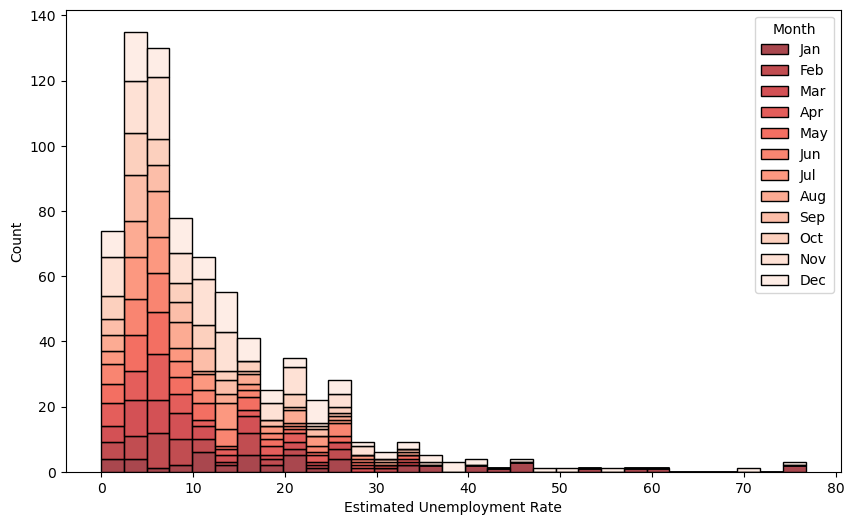

In [29]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Estimated Unemployment Rate", hue="Month_name", multiple="stack", palette="Reds")
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.legend(title="Month", loc="upper right", labels=month_order)
# multiple="stack", the bars for different categories (months) are stacked on top of each other.

### 2. Visualizing Estimated Employed Rate by Months

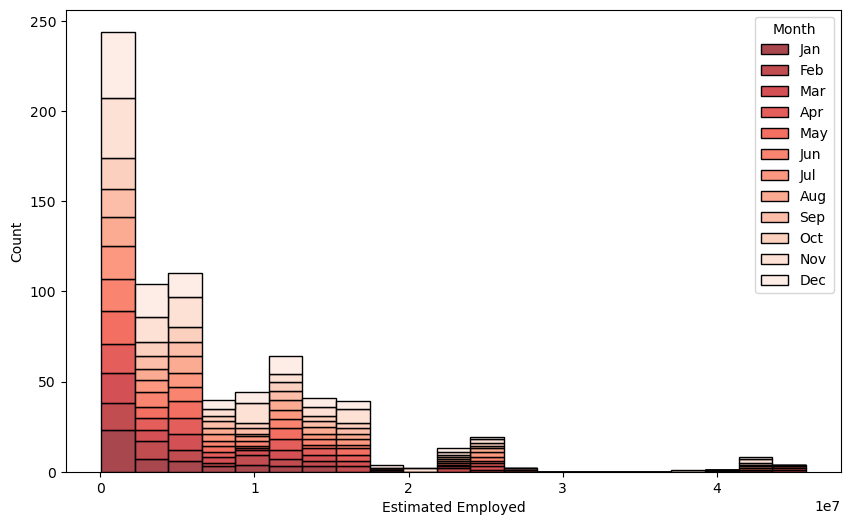

In [30]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="Estimated Employed", hue="Month_name", multiple="stack", palette="Reds")
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.legend(title="Month", loc="upper right", labels=month_order)

#### Numeric data grouped by months

In [31]:
data = df.groupby(['Month_name'])[['Estimated Unemployment Rate','Estimated Employed','Estimated Labour Participation Rate']].mean()
data=pd.DataFrame(data).reset_index()
data

Month_name  Estimated Unemployment Rate  Estimated Employed  \
0         Apr                    23.641569        5.283320e+06   
1         Aug                     9.637925        7.539815e+06   
2         Dec                     9.497358        7.377388e+06   
3         Feb                     9.964717        7.603996e+06   
4         Jan                     9.950755        7.677344e+06   
5         Jul                     9.033889        7.404425e+06   
6         Jun                    10.553462        7.372280e+06   
7         Mar                    10.700577        7.516581e+06   
8         May                    16.646190        6.666624e+06   
9         Nov                     9.868364        7.273661e+06   
10        Oct                     9.900909        7.298382e+06   
11        Sep                     9.051731        7.739464e+06   

    Estimated Labour Participation Rate  
0                             35.141176  
1                             43.646792  
2                             43.667358  
3                             43.723019  
4                             44.051321  
5                             43.706667  
6                             42.211058  
7                             43.084038  
8                             41.277143  
9                             44.110545  
10                            44.001273  
11                            44.301346

### 3. Visualizing Estimated Labour Participation Rate by Months

<Axes: xlabel='Estimated Labour Participation Rate', ylabel='Month_name'>

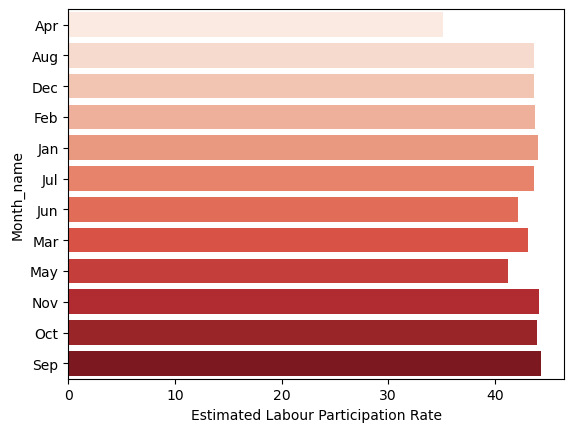

In [32]:
sns.barplot(x="Estimated Labour Participation Rate", y="Month_name",data=data, palette="Reds")

**Insights:** 'September' is having the highest Labour Participation Rate whereas 'April' with lowest Labour Participation rate.

### 4. Visualizing Estimated Employed Rate by Months using Bar plot

<Axes: xlabel='Estimated Employed', ylabel='Month_name'>

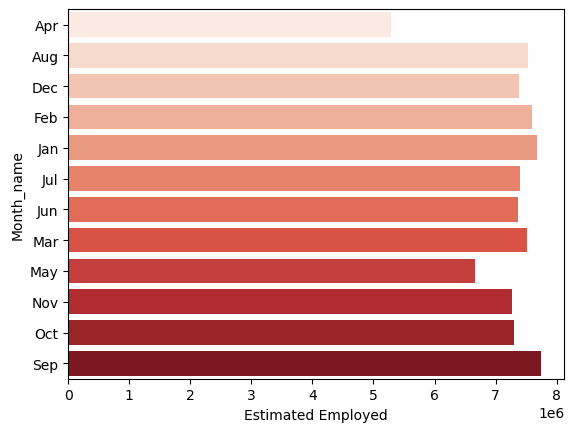

In [33]:
sns.barplot(x="Estimated Employed", y="Month_name",data=data, palette="Reds")

**Insights:** 'September' is having the highest Estimated Employment Rate whereas 'April' with lowest Estimated Employment rate.

In [34]:
# Plotting Estimated Unemployment Rate and Labour Participation Rate by Months
month = data.Month_name
unemployment_rate = data['Estimated Unemployment Rate']
labour_participation_rate = data['Estimated Labour Participation Rate']

# assign colors using a dictionary
colors = {'Unemployment Rate':'#aa1016', 
          'Labour Participation Rate':'#f44f39'}

# plotly figure
fig = go.Figure()
fig.add_trace(go.Bar(x = month,y = unemployment_rate,name = 'Unemployment Rate', marker_color=colors['Unemployment Rate']))
fig.add_trace(go.Bar(x = month,y = labour_participation_rate,name = 'Labour Participation Rate', marker_color=colors['Labour Participation Rate']))
fig.update_layout(title = {'text':'<b>Estimated Unemployment Rate and Labour Participation Rate by Months</b>', 'x':0.43, 
                           'xanchor': 'center'},
                     xaxis = {'categoryorder':'array','categoryarray':['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct']}      )
fig.show()

**Note:** GitHub does not render interactive graphs. View the dynamic visualization by running the code locally for full interactivity or try loading this page with nbviewer.org

**Insights:** From the above visualization, we can see that, 
- In the month of September and November, there is high amount of Labour Participation Rate of 44.3 and 44.1 respectively.
- And in the month of April and May, there is high amount of Estimated Unemployment Rate of 23.6 and 16.6 respectively.
- But April month is having the lowest Labour Participation Rate and July and September months are having the lowest Unemployment Rate.

## State-Wise Analysis <a id="State-Wise"></a>

### 1. Visualizing Estimated Unemployment Rate (%) by States

In [35]:
# Box plot of Unemployment Rate by States
fig = px.box(df, x='States', y='Estimated Unemployment Rate', color='States', title='<b>Unemployment Rate by States</b>', 
             template='plotly', notched=True, color_discrete_sequence=px.colors.sequential.Reds[::-1])
fig.update_layout(xaxis={'categoryorder': 'total descending'}, title={'x':0.5, 'xanchor': 'center'})
fig.update_xaxes(tickangle=-90)
fig.show()

**Note:** GitHub does not render interactive graphs. View the dynamic visualization by running the code locally for full interactivity or try loading this page with nbviewer.org

**Observation:** 
- There are many outliers but we can't remove them as they still represent valid information.

**Insights:** From the above visualization, we can see that, 
- Tripura is having the highest Unemployment Rate followed by Haryana and Jharkhand.
- Sikkim is having the lowest Unemployment Rate followed by Meghalaya and Odisha.

### 2. Visualizing Estimated Unemployment Rate (%) by States and Area

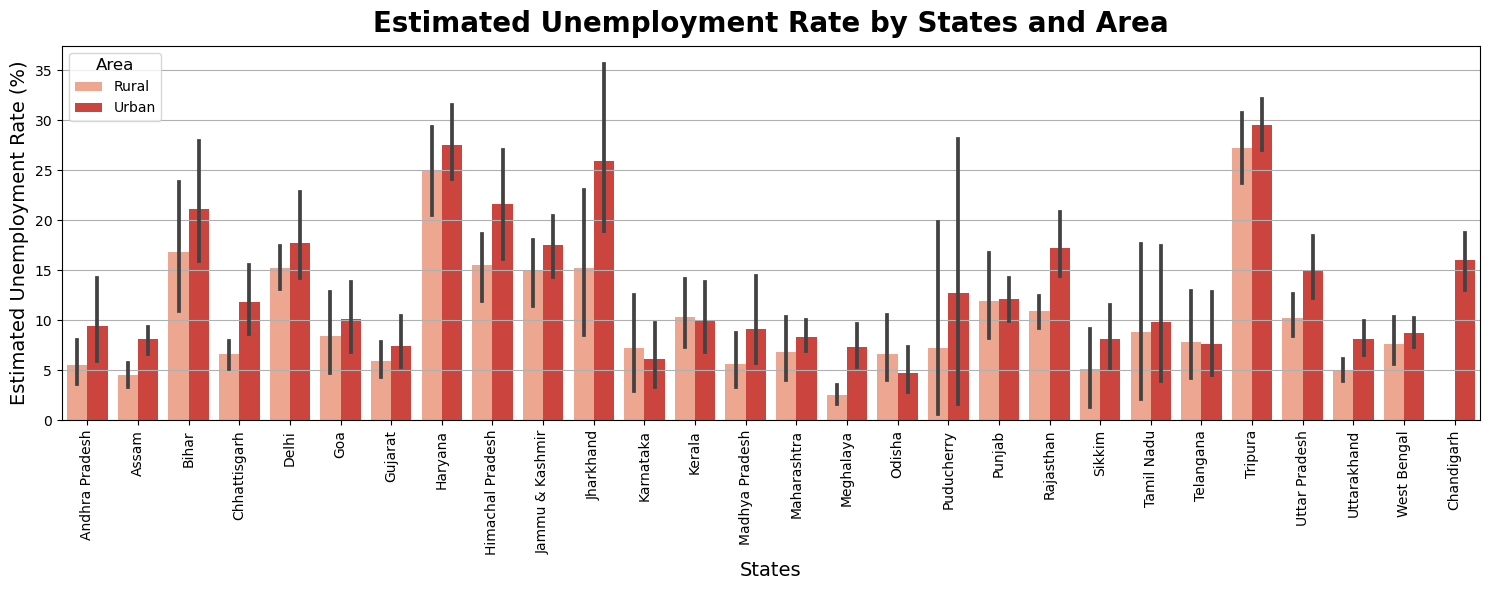

In [36]:
# Plotting Estimated Unemployment Rate (%) by States and Area
plt.figure(figsize=(15, 6))
sns.barplot(x='States', y='Estimated Unemployment Rate', hue='Area', data=df, palette="Reds")
plt.xlabel('States', fontsize=14)
plt.ylabel('Estimated Unemployment Rate (%)',fontsize=14)
plt.title('Estimated Unemployment Rate by States and Area',fontweight="black",fontsize=20,pad=10)
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.legend(title='Area', title_fontsize='12')
plt.tight_layout()
plt.show()

**Insights:** From the above visualization, we can see that, 
- Tripura is having the highest Unemployment Rate both in Rural and Urban area followed by Haryana.
- Meghalaya is having the lowest Unemployment Rate in Rural area and Odisha is having the lowest Unemployment Rate in Urban area.

### 3. Visualizing Unemployment rate across States from May. 2019 to Apr. 2020

In [37]:
# Animated bar plot of Unemployment rate across States from May. 2019 to Apr. 2020
fig = px.bar(df, x='States', y='Estimated Unemployment Rate', animation_frame='Month_name', color='States',
             title='<b>Unemployment rate across States from May. 2019 to Apr. 2020</b>', height=600,
            color_discrete_sequence = px.colors.sequential.Reds[::-1])

fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1000
fig.update_layout(title={'x':0.5, 'xanchor': 'center'})
fig.update_xaxes(tickangle=-90)

# position the slider
fig['layout']['updatemenus'][0]['pad']=dict(r= 10, t= 150)
fig['layout']['sliders'][0]['pad']=dict(r= 9, t= 130,)
fig.show()

**Note:** GitHub does not render interactive graphs. View the dynamic visualization by running the code locally for full interactivity or try loading this page with nbviewer.org

**Insights:** From the above animated bar plot, we can observe that, 
- The Unemployment rate across States from May 2019 to April 2020 is having a downward trend of Unemployment rate.
- Mostly Tripura and Haryana states are always having the highest Unemployment rate.

### 4. Visualizing Average Unemployment Rate State Wise

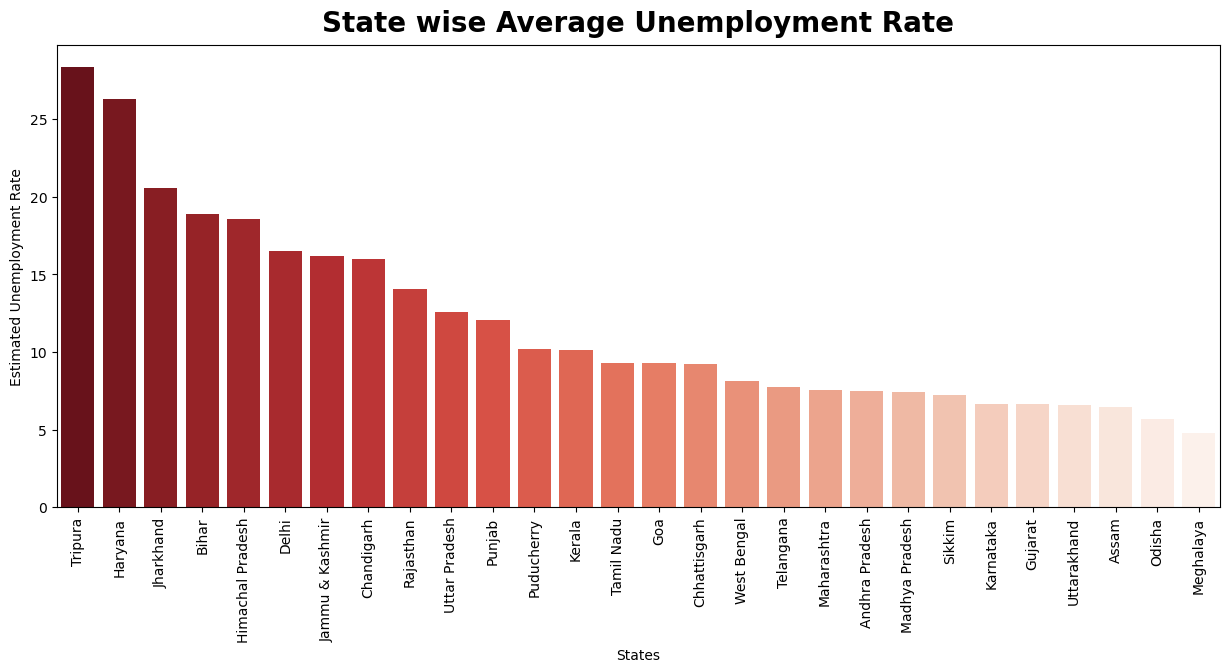

In [38]:
x = df.groupby(["States"])["Estimated Unemployment Rate"].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,6))
sns.barplot(x=x.index,y=x["Estimated Unemployment Rate"],palette=sns.color_palette("Reds",28)[::-1])
plt.title("State wise Average Unemployment Rate",fontweight="black",fontsize=20,pad=10)
plt.xticks(rotation=90)
plt.show()

**Insights:**

- We can clearly observe that Tripura is having the Highest Average Unemplyment Rate followed by Haryana.
- Meghalaya state is having the lowest Average Unemplyment Rate followed by Odisha.

### 5. Visualizing State Wise Average Labour Particiaption Rate

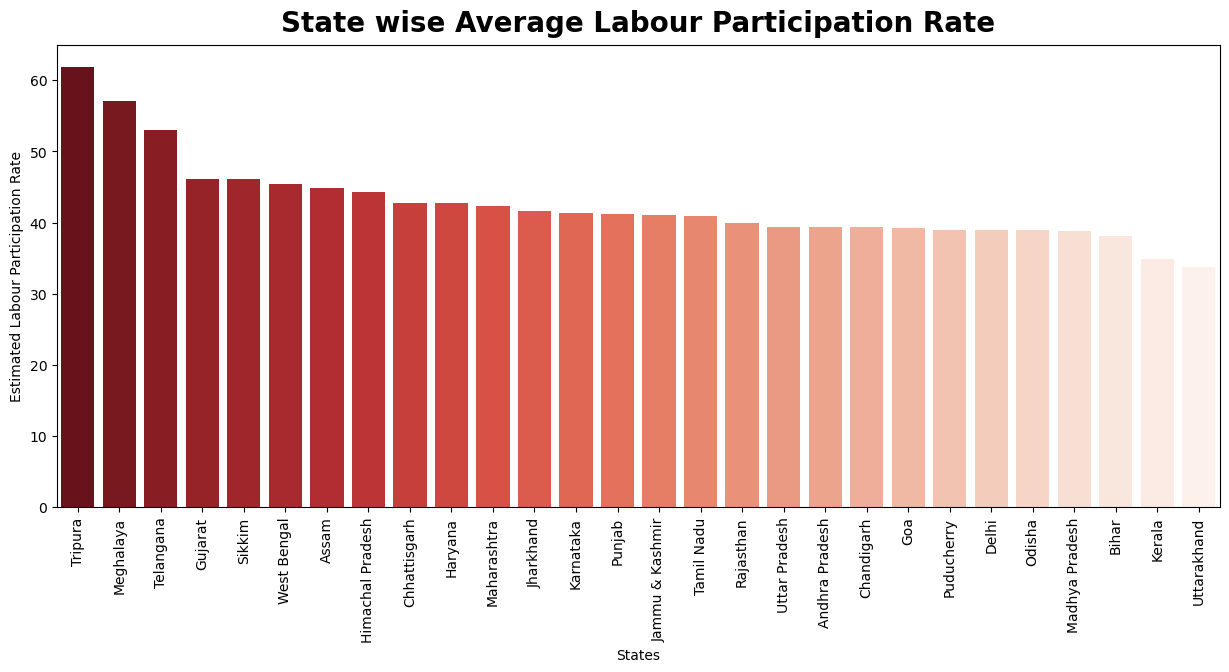

In [39]:
x = df.groupby(["States"])["Estimated Labour Participation Rate"].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,6))
sns.barplot(x=x.index,y=x["Estimated Labour Participation Rate"],palette=sns.color_palette("Reds",28)[::-1])
plt.title("State wise Average Labour Participation Rate",fontweight="black",fontsize=20,pad=10)
plt.xticks(rotation=90)
plt.show()

**Insights:**
    
- We can observe that Tripura is having the highest Labour participation Rate followed by Meghalaya.
- We can also observe that uttarakhand is having the lowest Labour participation Rate followed by Kerala.

### 6. Visualizing State Wise Total Estimated Employed

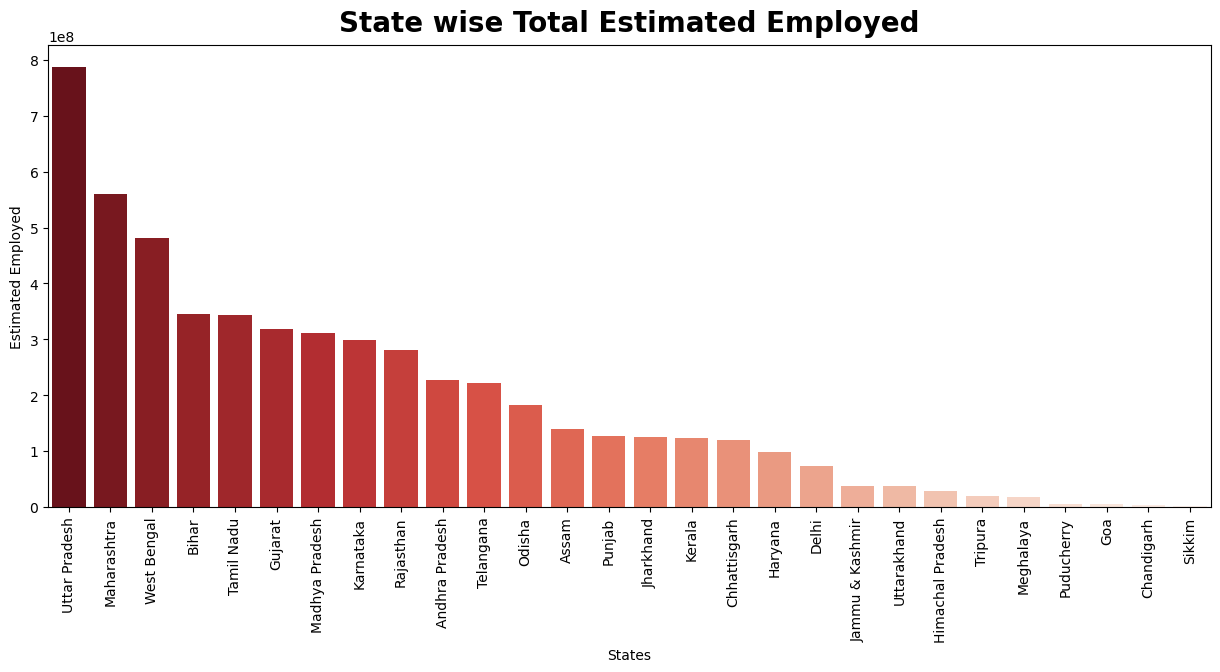

In [40]:
x = df.groupby(["States"])["Estimated Employed"].sum().sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,6))
sns.barplot(x=x.index,y=x["Estimated Employed"],palette=sns.color_palette("Reds",28)[::-1])
plt.title("State wise Total Estimated Employed",fontweight="black",fontsize=20,pad=10)
plt.xticks(rotation=90)
plt.show()

**Insights:**

- We can observe that Uttar Pradesh is having the highest total estimated employed followed by Maharashtra.
- Sikkim is having the lowest total estimated employed followed by chandigarh
- So we can make an insight that estimated employee is totally dependent on population

## Area-Wise Analysis <a id="Area-Wise"></a>

### 1. Visualizing Distribution of Areas

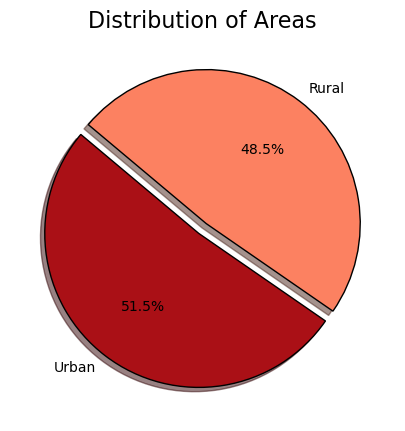

In [41]:
# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "black"}

# Creating plot
fig, ax = plt.subplots(figsize=(8, 5))
area_counts = df['Area'].value_counts()
ax.pie(area_counts, labels=area_counts.index,
        autopct='%1.1f%%', shadow=True, startangle=140,
        explode=(.04, .04), wedgeprops=wp,
        colors = ['#aa1016', '#fc8161'], textprops=dict(color="black"))

ax.set_title("Distribution of Areas",size=16)

plt.show()

**Insights:** From the above pie chart, we can see that the maximum distribution of area is from urban which is of 51.5% and then comes from rural which is of 48.5%

### 2. Visualizing relationships between numerical columns by Area

<Figure size 1000x800 with 0 Axes>

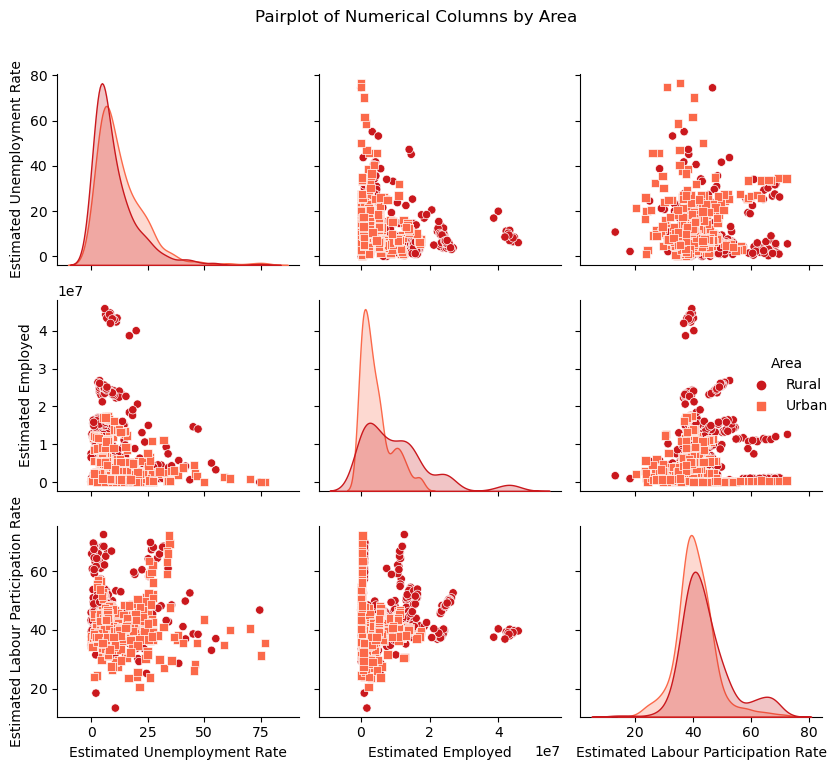

In [42]:
# Pairplot to visualize relationships between numerical columns by Area
plt.figure(figsize=(10, 8))
sns.pairplot(data=df, vars=['Estimated Unemployment Rate', 'Estimated Employed', 'Estimated Labour Participation Rate'], 
             hue='Area', markers=['o', 's'], palette=sns.color_palette("Reds",3)[::-1])
plt.suptitle('Pairplot of Numerical Columns by Area', y=1.02)
plt.tight_layout()
plt.show()

**Insights:** From the above pairplot we can clearly observe that Urban Area tend to have the most distribution than rural area in all the features. 

### 3. Visualizing Average Unemployment Rate & Labour Participation Rate w.r.t Area

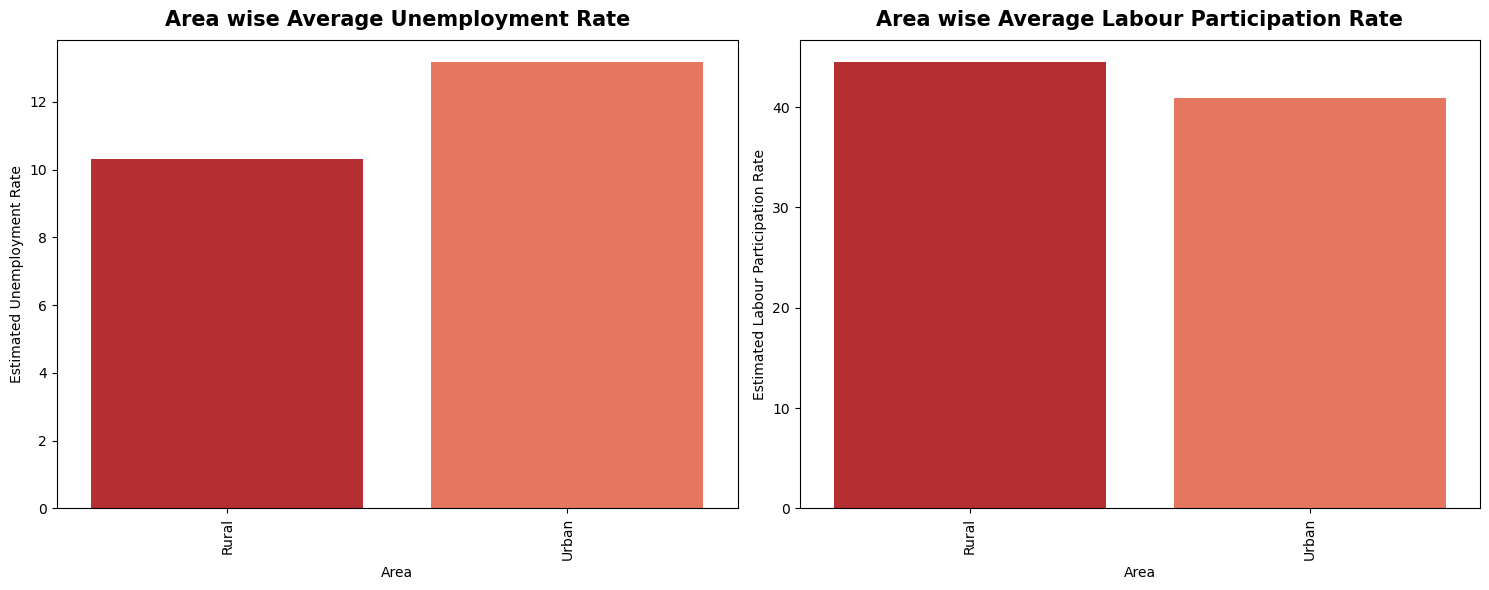

In [43]:
x = df.groupby(["Area"])["Estimated Unemployment Rate"].mean().sort_values(ascending=False).to_frame()
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=x.index,y=x["Estimated Unemployment Rate"],palette=sns.color_palette("Reds",3)[::-1])
plt.title("Area wise Average Unemployment Rate",fontweight="black",fontsize=15,pad=10)
plt.xticks(rotation=90)

z = df.groupby(["Area"])["Estimated Labour Participation Rate"].mean().sort_values(ascending=False).to_frame()
plt.subplot(1,2,2)
sns.barplot(x=z.index,y=z["Estimated Labour Participation Rate"],palette=sns.color_palette("Reds",3)[::-1])
plt.title("Area wise Average Labour Participation Rate",fontweight="black",fontsize=15,pad=10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Observations:**

- We can clearly observe that Urban Area is having more Unemployment Rate when compared with Rural Area.
- But when it comes to Labour Participation Rate , Rural Area is having more labours when compared with Urban Area

**Insights:**

- Urban Area is having more Unemployment Rate even though with low labour rate when compared with Rural Area.

### 4. Visualizing Area-wise Percentage of Labour Participation Rate per Month

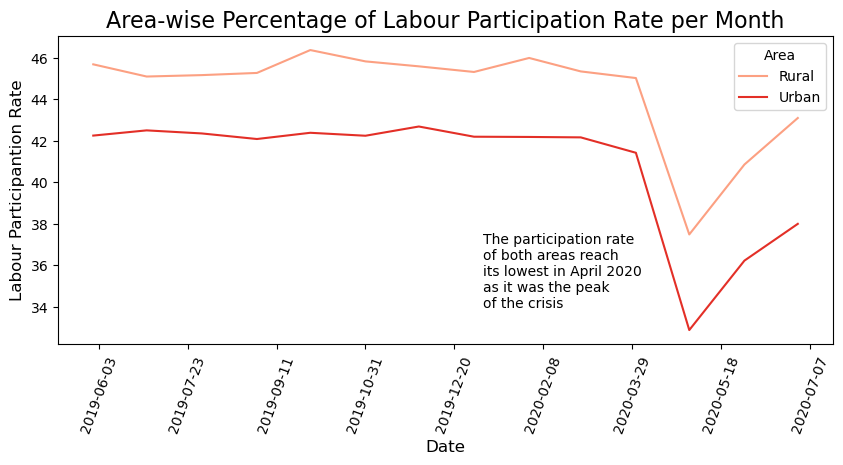

In [44]:
plt.figure(figsize=(10,4))
ax=sns.lineplot(data=df, x='Date', y='Estimated Labour Participation Rate', hue='Area', errorbar= None, palette="Reds")
plt.title('Area-wise Percentage of Labour Participation Rate per Month', size=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Labour Participantion Rate', fontsize=12)
plt.xticks(rotation= 70)
ax.xaxis.set_major_locator(plt.MaxNLocator())
plt.figtext(x= 0.55, y= 0.2 , s= 'The participation rate\nof both areas reach\nits lowest in April 2020\nas it was the peak\nof the crisis')
plt.show()

**Insights:** From the above lineplot, we can clearly see that the participation rate of both rural and urban areas reach its lowest in the month of April 2020 as it was the peak of the crisis.

## Area-State Analysis <a id="Area-State"></a>

In [45]:
# Grouping all the features by Area and States 
area_state_data = df.groupby(['Area', 'States'])[['Estimated Unemployment Rate','Estimated Employed',
                                                   'Estimated Labour Participation Rate']].mean().reset_index()
area_state_data.head()

Area          States  Estimated Unemployment Rate  Estimated Employed  \
0  Rural  Andhra Pradesh                     5.526429        1.180859e+07   
1  Rural           Assam                     4.490833        9.716618e+06   
2  Rural           Bihar                    16.770000        2.184369e+07   
3  Rural      Chandigarh                          NaN                 NaN   
4  Rural    Chhattisgarh                     6.628571        6.501684e+06   

   Estimated Labour Participation Rate  
0                            42.963571  
1                            47.072500  
2                            38.417143  
3                                  NaN  
4                            42.442857

### Visualizing Unemployment Rate and Employment Rate by States and Area

In [46]:
# extract data and structure FROM px.sunburst1
sunburst1 = px.sunburst(area_state_data,path=['Area','States'],values='Estimated Unemployment Rate', 
                  color_discrete_sequence = px.colors.sequential.Reds)

# extract data and structure FROM px.sunburst2
sunburst2 = px.sunburst(area_state_data,path=['Area','States'],values='Estimated Employed', 
                        color_discrete_sequence = px.colors.sequential.Reds)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "sunburst"}, {"type": "sunburst"}]], column_widths=[0.5, 0.5],
                    subplot_titles=("<b>Unemployment Rate by States and Area</b>", "<b>Employment Rate by State and Area</b>"))

fig.add_trace(sunburst1.data[0], row=1, col=1)
fig.add_trace(sunburst2.data[0], row=1, col=2)
fig.show()

**Note:** GitHub does not render interactive graphs. View the dynamic visualization by running the code locally for full interactivity or try loading this page with nbviewer.org

**Insights:** From the above sunburst plots, we can clearly see that,
- Urban area has the highest estimated unemployment rate than rural area.
- Rural area has the highest estimated employment rate than urban area.
- Tripura and Haryana States have the highest estimated unemployment rate both in urban and rural area.
- Uttar Pradesh and West Bengal have the highest estimated employment rate in Rural area whereas in Urban area, Maharashtra and Uttar Pradesh have the highest estimated employment rate.

## Year-Wise Visualization <a id="Year-Wise"></a>

### 1. Visualizing Unemployment and Labour Rate throughout the years

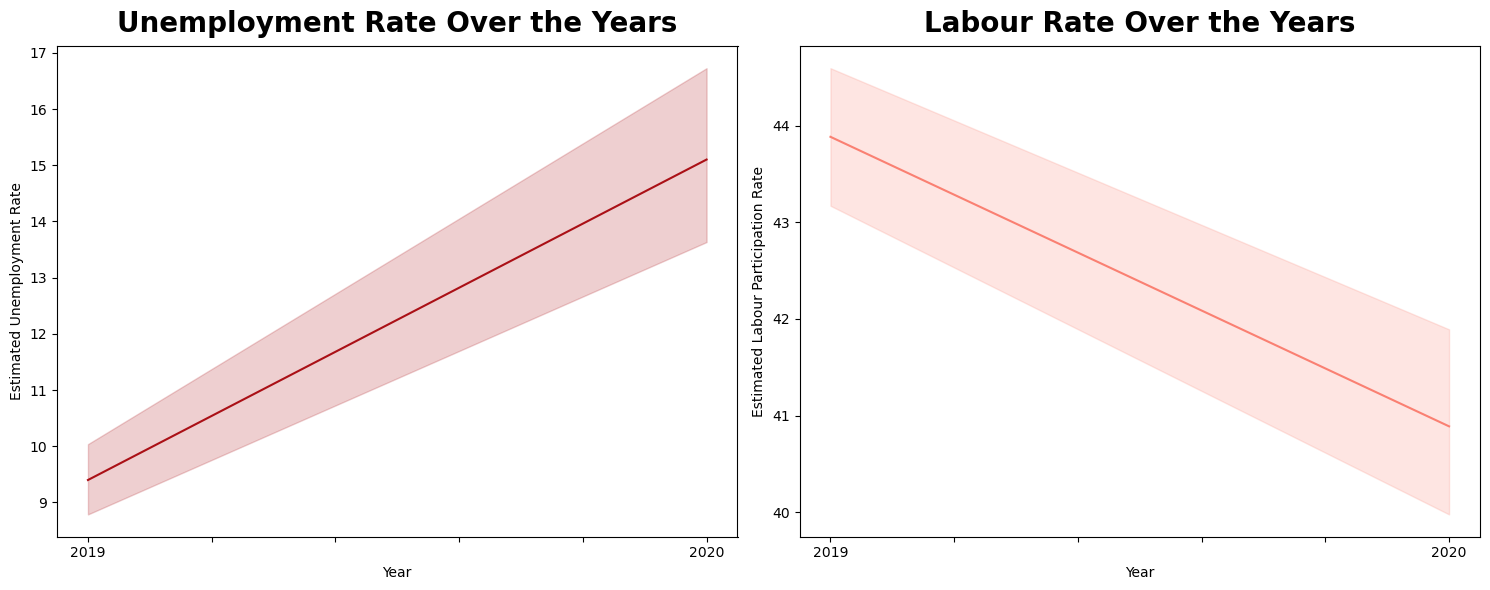

In [47]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.lineplot(x=df["Year"],y=df["Estimated Unemployment Rate"],color="#aa1016")
ax.set_xticklabels(["","2019","","","","","2020"])
plt.title("Unemployment Rate Over the Years",fontweight="black",fontsize=20,pad=10)

plt.subplot(1,2,2)
ax = sns.lineplot(x=df["Year"],y=df["Estimated Labour Participation Rate"],color="#fa8072")
ax.set_xticklabels(["","2019","","","","","2020"])
plt.title("Labour Rate Over the Years",fontweight="black",fontsize=20,pad=10)
plt.tight_layout()
plt.show()

**Observations:**

- From first plot we can clearly observe that there was a Huge increment in Unemployment over the years.
- From second plot we can clarly observe that there was a Huge decrement in Labour Rate over the years

**Insights:**

- Here, we can make an insight that the Unemployment rate has increased to double from 2019 to 2020. 
- The Labour Rate decreased drastically from 2019 to 2020

### 2. Visualizing Unemployment & Labour Rate in 2019 throughout the months

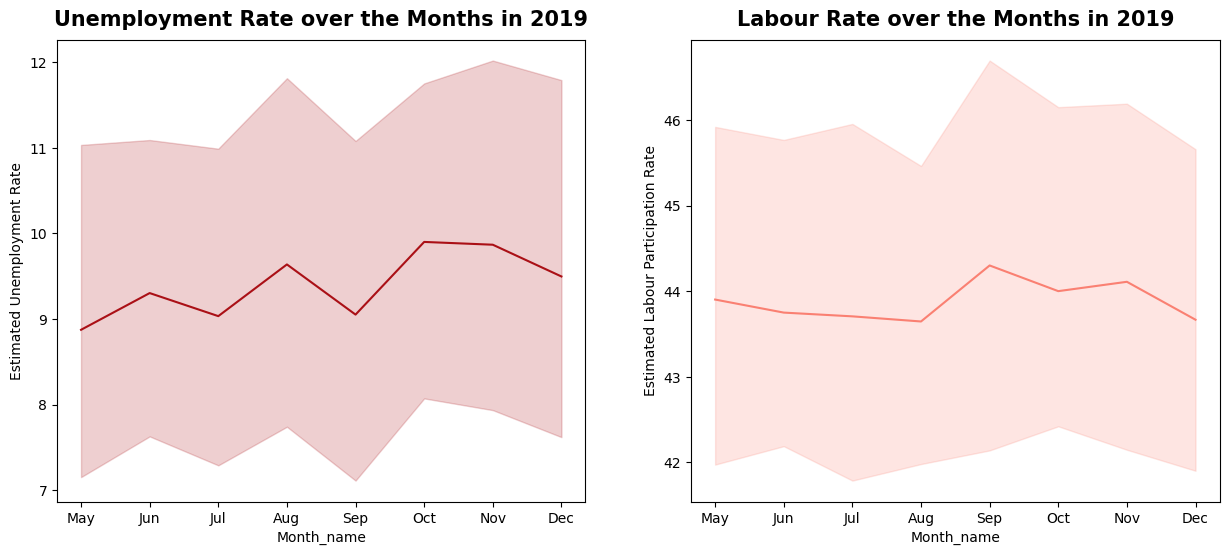

In [48]:
x = df[df["Year"]==2019]
y = df[df["Year"]==2020]

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.lineplot(x=x["Month_name"],y=x["Estimated Unemployment Rate"],color="#aa1016")
plt.title("Unemployment Rate over the Months in 2019",fontweight="black",fontsize=15,pad=10)

plt.subplot(1,2,2)
sns.lineplot(x=x["Month_name"],y=x["Estimated Labour Participation Rate"],color="#fa8072")
plt.title("Labour Rate over the Months in 2019",fontweight="black",fontsize=15,pad=10)
plt.show()

**Observations:**

- From first plot we can observe that there was increment and decrement in Unemployment Rate throughout the Months in 2019
- From the second plot we can observe that there was increment and decrement in Labour Rate throughout the Months in 2019.

**Insights:**

- We can make an insight that before corona-virus occured in India the Unemployment Rate & the Labour Rate was not affected that much.

### 3. Visualizing Unemployment & Labour Rate in 2020 throughout the months

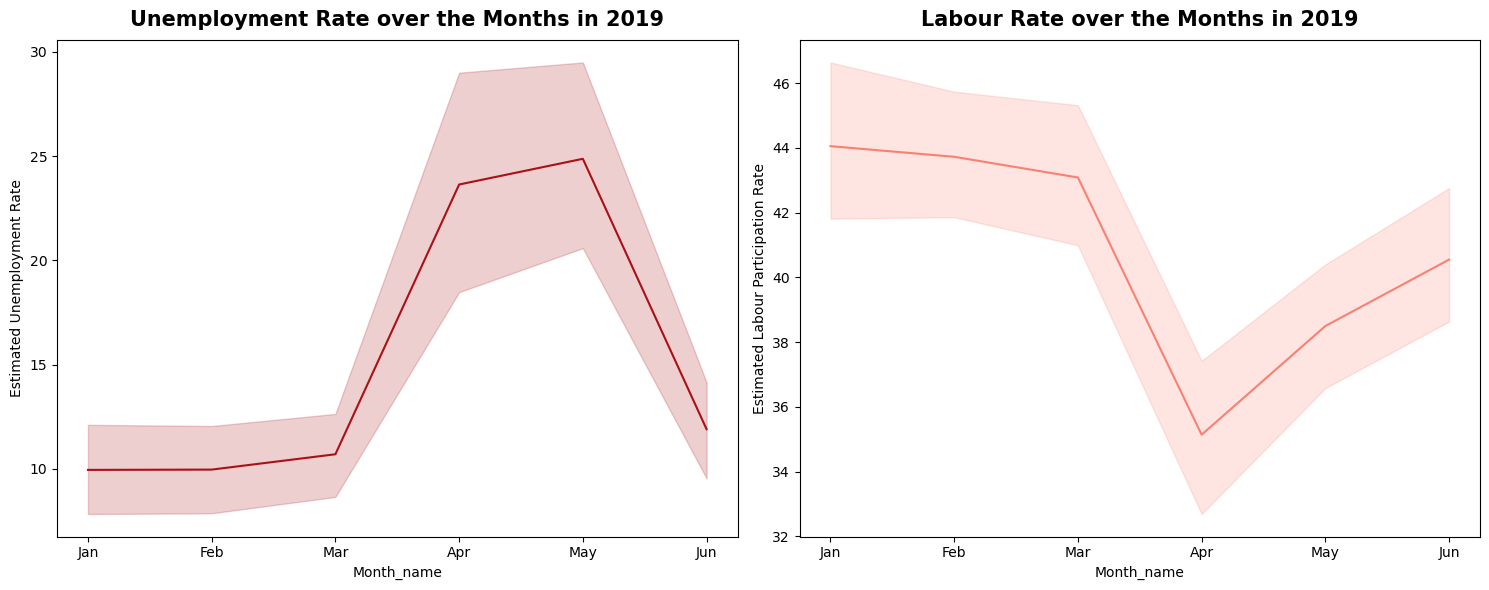

In [49]:
x = df[df["Year"]==2020]

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.lineplot(x=x["Month_name"],y=x["Estimated Unemployment Rate"],color="#aa1016")
plt.title("Unemployment Rate over the Months in 2019",fontweight="black",fontsize=15,pad=10)

plt.subplot(1,2,2)
sns.lineplot(x=x["Month_name"],y=x["Estimated Labour Participation Rate"],color="#fa8072")
plt.title("Labour Rate over the Months in 2019",fontweight="black",fontsize=15,pad=10)
plt.tight_layout()
plt.show()

**Observations:**

- From the first plot we can clearly observe that in the month of March to May in 2020 there was a huge increment in Unemployment Rate
- From the second plot we can clearly observe that in the month of March to April in 2020 there was a huge decrement in Labour Rate

**Insights:**

- We know that COVID-19 occured in India in the month of January in 2020 and the first nationwide lockdown in India was announced by Prime Minister Narendra Modi on March 24, 2020, in response to the COVID-19 pandemic.
- So we can make an insight that due to the COVID-19 Lockdown there was a huge increment in Unemployment Rate and Huge Decrement in Labour Rate.

## Impact of COVID-19 Lockdown in Unemployment Rate in India <a id="COVID-19"></a>

### 1. Visualizing States Wise Increment in Unemployment Rate During the Lockdown

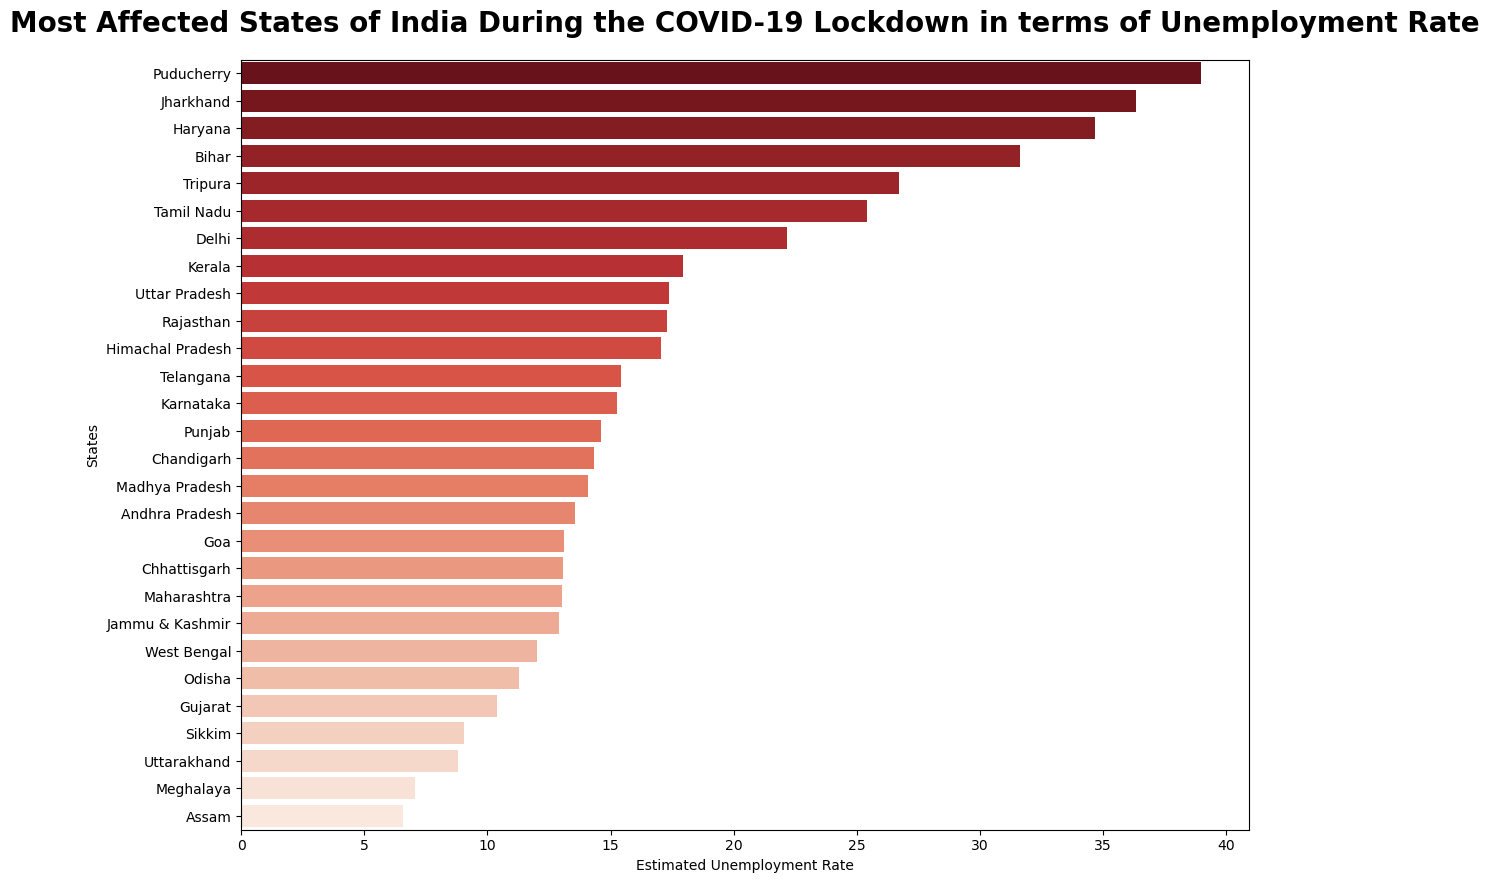

In [50]:
x = df[(df["Year"]==2020) & ((df["Date"].dt.month)>=3)]

z = x.groupby(["States"])["Estimated Unemployment Rate"].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(13,10))
sns.barplot(x=z["Estimated Unemployment Rate"],y=z.index,palette=sns.color_palette("Reds",30)[::-1])
plt.title("Most Affected States of India During the COVID-19 Lockdown in terms of Unemployment Rate",
          fontweight="black",fontsize=20,pad=20)
plt.show()

**Insights:**

Top 5 most affected states during the COVID-19 Lockdown in terms of Unemployment Rate are:-
- Puducherry
- Jharkhand
- Haryana
- Bihar
- Tripura

 ### 2. Visualizing States Wise Increment in Labour Rate During the Lockdown

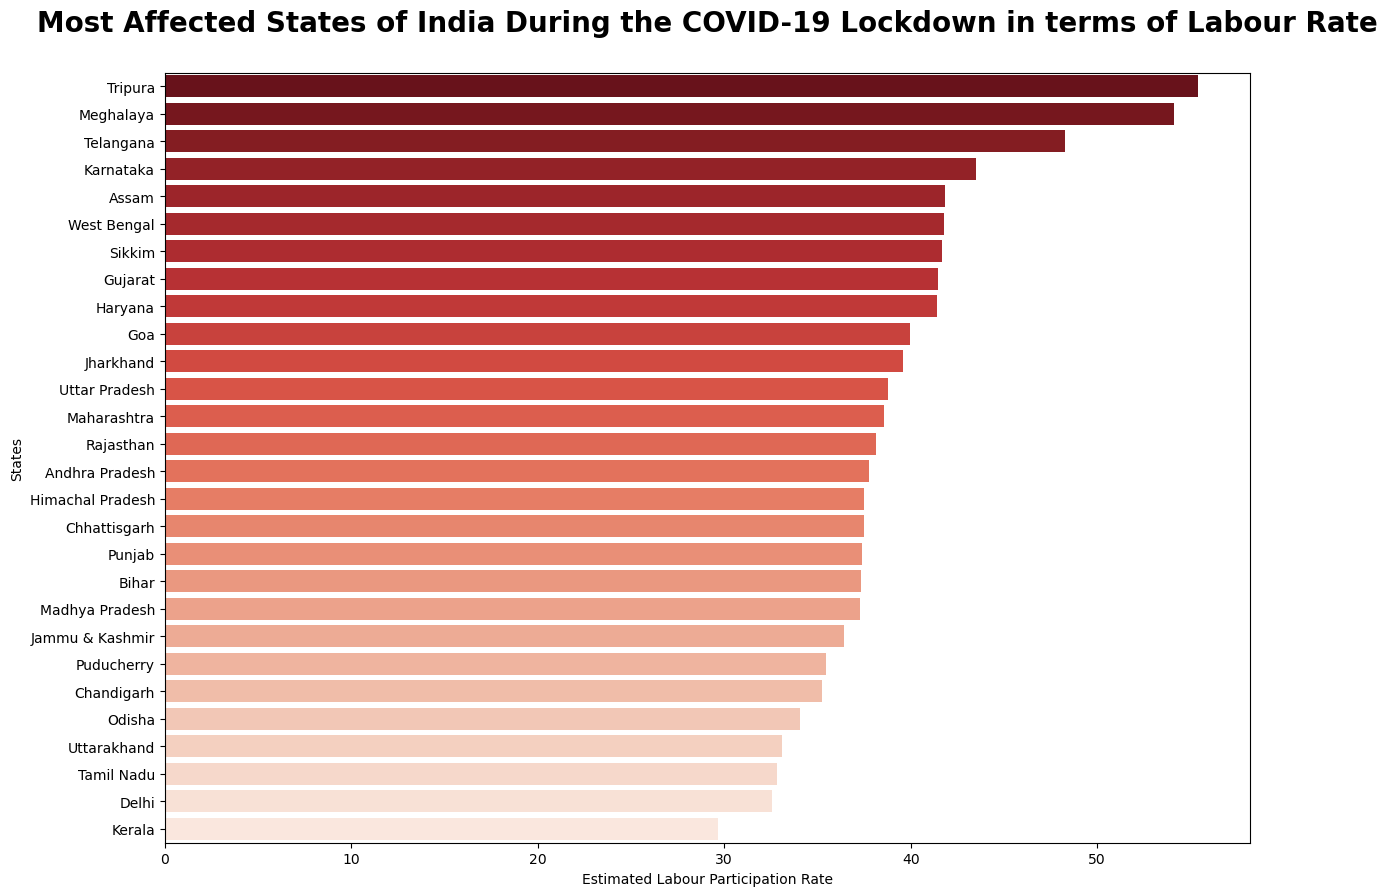

In [51]:
x = df[(df["Year"]==2020) & ((df["Date"].dt.month)>=3)]

z = x.groupby(["States"])["Estimated Labour Participation Rate"].mean().sort_values(ascending=False).to_frame()

plt.figure(figsize=(14,10))
sns.barplot(x=z["Estimated Labour Participation Rate"],y=z.index,palette=sns.color_palette("Reds",30)[::-1])
plt.title("Most Affected States of India During the COVID-19 Lockdown in terms of Labour Rate",
          fontweight="black",fontsize=20,pad=30)
plt.show()

**Insights:**

Top 5 most affected states during the COVID-19 Lockdown in terms of Labour Rate are:-
- Tripura
- Meghalaya
- Telangana
- Karnataka
- Assam

To understand more clearly, lets
- Create a copy of the dataset for the data of during lockdown period.
- Then take the range of date from 2019-05-31 to 2020-03-24 as before lockdown period 
- And date after 2020-03-25 as during lockdown period because on the evening of 24 March 2020, the Government of India ordered a nationwide lockdown for 21 days.
- Taking these dates into consideration, lets perform analysis based on Before and during the Lockdown period and gain insights on Unemployment Rate in India.

In [52]:
# Lets create a copy of the dataset for the data of during lockdown period
df_ld = df.copy()

In [53]:
#State date from the Dataset
start_date = df['Date'].max()
start_date

Timestamp('2020-06-30 00:00:00')

In [54]:
#End date from the Dataset
end_date = df['Date'].min()
end_date

Timestamp('2019-05-31 00:00:00')

In [55]:
# Define a date range mask to filter rows where 'Date' falls within the range of before lockdown period
mask = (df['Date'] >= '2019-05-31') & (df['Date'] <= '2020-03-24')

# Use the mask to select and keep only the rows that meet the date range criteria
df = df.loc[mask]

In [56]:
# Define a date range mask to filter rows where 'Date' falls within the range of during lockdown period
mask = (df_ld['Date'] >= '2020-03-25')

# Use the mask to select and keep only the rows that meet the date range criteria
df_ld = df_ld.loc[mask]

### 3. Visualizing Area wise Estimated Unemployment Rate before and during lockdown

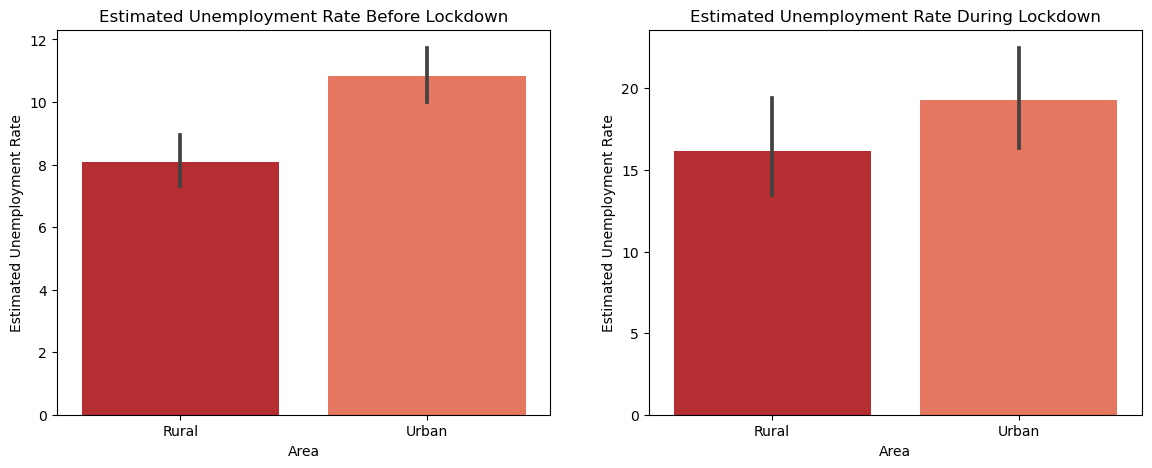

In [57]:
# Bar plot visualization for Area wise Estimated Unemployment Rate before and during lockdown

# Create a figure with two subplots side by side.
plt.figure(figsize=(14, 5))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Create a bar plot using Seaborn to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(x='Area', y='Estimated Unemployment Rate', data=df, palette=sns.color_palette("Reds",3)[::-1])

# Set labels and title for the first subplot.
plt.xlabel("Area", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate Before Lockdown', fontsize=12)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Create a bar plot for the Estimated Unemployment Rate during lockdown.
sns.barplot(x='Area', y='Estimated Unemployment Rate', data=df_ld, palette=sns.color_palette("Reds",3)[::-1])

# Set labels and title for the second subplot.
plt.xlabel("Area", fontsize=10)
plt.ylabel('Estimated Unemployment Rate', fontsize=10)
plt.title('Estimated Unemployment Rate During Lockdown', fontsize=12)

# Display the subplots side by side.
plt.show()

**Insights:** From the above charts we can clearly observe that the Estimated Unemployment Rate are much higher during the lockdown time compare to the before lockdown.

### 4. Visualizing State Wise Estimated Unemployment Rate before and during lockdown

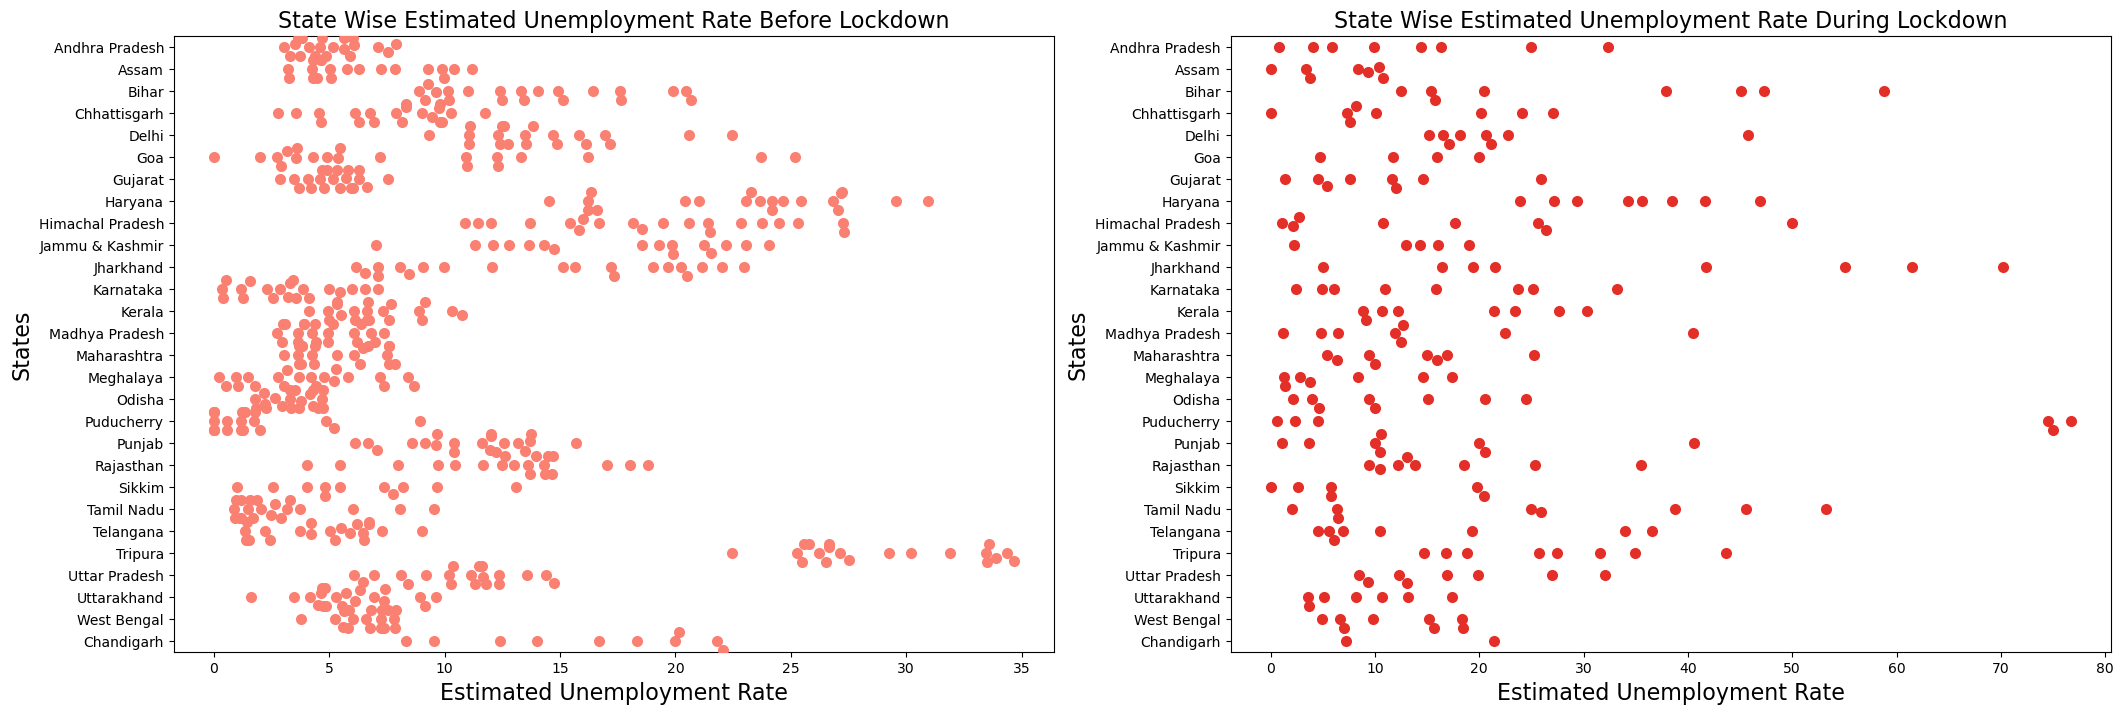

In [58]:
# Swarm plot visualization for State Wise Estimated Unemployment Rate before and during lockdown.

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: State Wise Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("State Wise Estimated Unemployment Rate Before Lockdown", fontsize=16)

# Create a swarm plot to visualize the Estimated Unemployment Rate before lockdown.
sns.swarmplot(y="States", x='Estimated Unemployment Rate', data=df, size=8, color="#fa8072")

# Set labels for the first subplot.
plt.xlabel("Estimated Unemployment Rate", fontsize=16)
plt.ylabel("States", fontsize=16)

# Subplot 2: State Wise Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("State Wise Estimated Unemployment Rate During Lockdown", fontsize=16)

# Create a swarm plot to visualize the Estimated Unemployment Rate during lockdown.
sns.swarmplot(y="States", x='Estimated Unemployment Rate', data=df_ld, size=8, color= '#e32f27')

# Set labels for the second subplot.
plt.xlabel("Estimated Unemployment Rate", fontsize=16)
plt.ylabel("States", fontsize=16)

# Display the subplots side by side.
plt.show()

**Insights:** From the above charts we can clearly see that, 
- Before the lockdown period, Haryana and Tripura both have the highest Estimated Unemployment Rate.
- Whereas, during the lockdown time, Puducherry and Jharkhand has the highest Estimated Unemployment Rate.

### 5. Visualizing State Wise Estimated Unemployment Rate before and during lockdown time

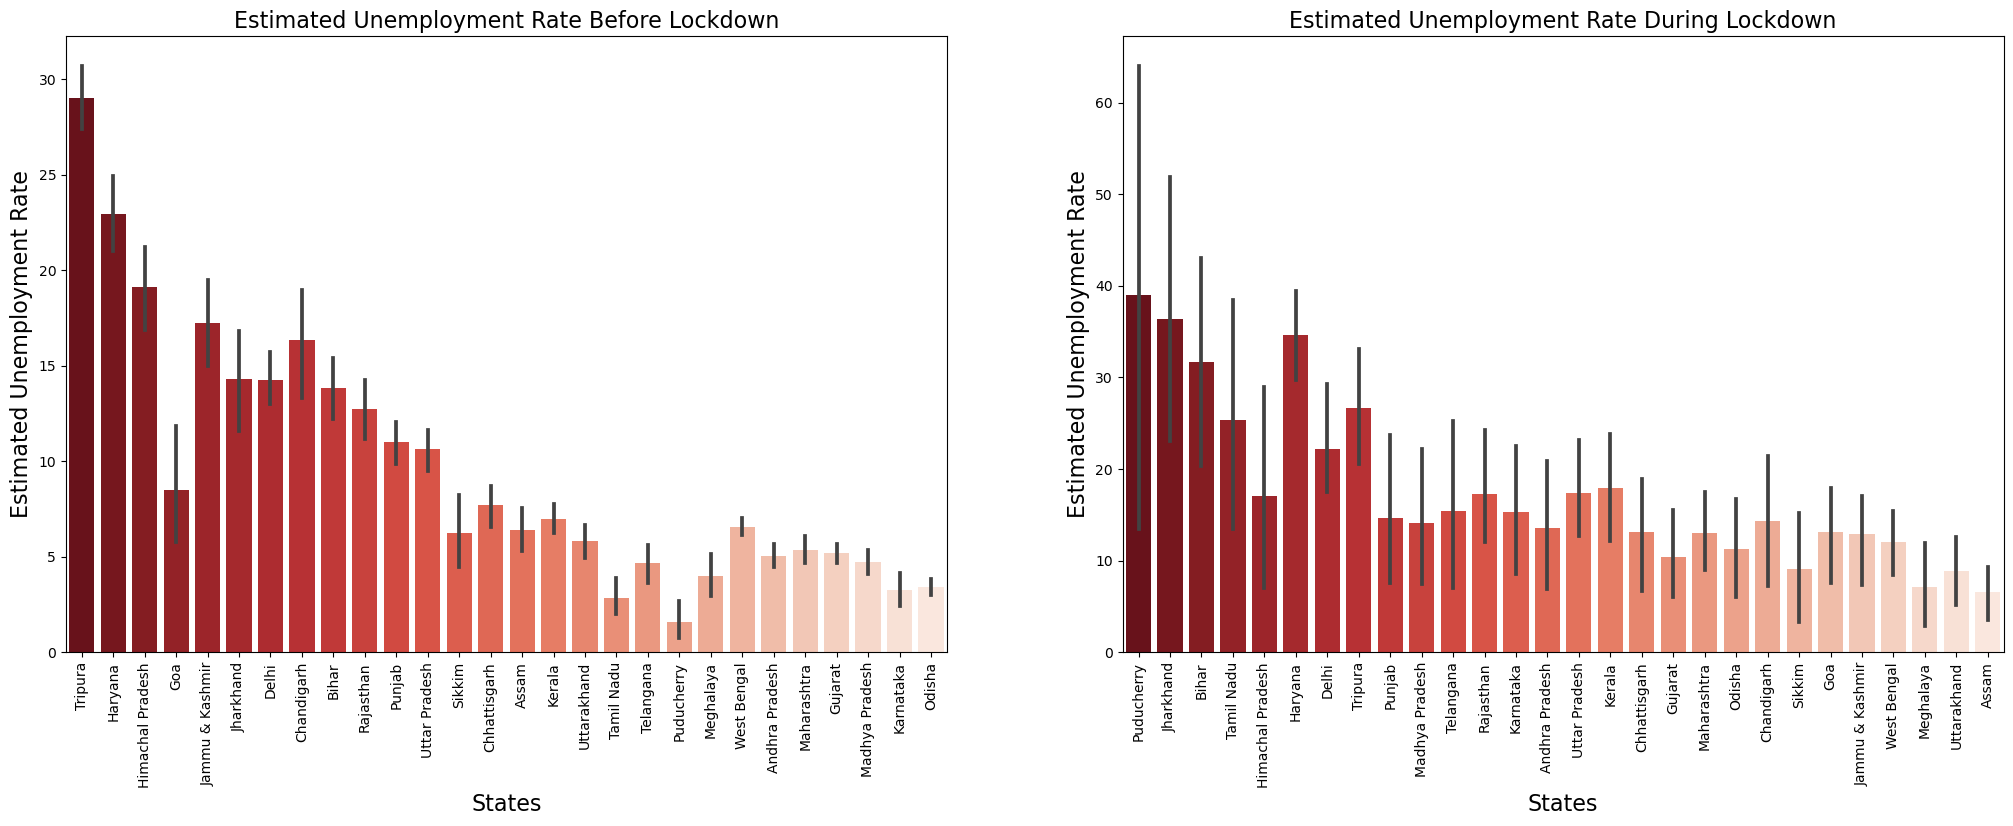

In [59]:
# Bar for visualization for State wise Estimated Unemployment Rate before and during lockdown time.

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Unemployment Rate Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Unemployment Rate Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate before lockdown.
sns.barplot(data=df.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate",
           palette=sns.color_palette("Reds",30)[::-1])
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Subplot 2: Estimated Unemployment Rate During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Unemployment Rate During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Unemployment Rate during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Unemployment Rate', ascending=False), x="States", y="Estimated Unemployment Rate",
           palette=sns.color_palette("Reds",30)[::-1])
plt.xticks(rotation=90)
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Unemployment Rate', fontsize=16)

# Display the subplots side by side.
plt.show()

**Insights:** From the above charts we can clearly observe that,
- Tripura, Haryana and Himachal Pradesh are having the highest Estimated Unemployment Rate before lockdown time. 
- Puducherry, Jharkhand and Bihar comes are having the highest Estimated Unemployment Rate during the lockdown time.

### 6. Visualizing State Wise Estimated Employed Workforce before and during lockdown time

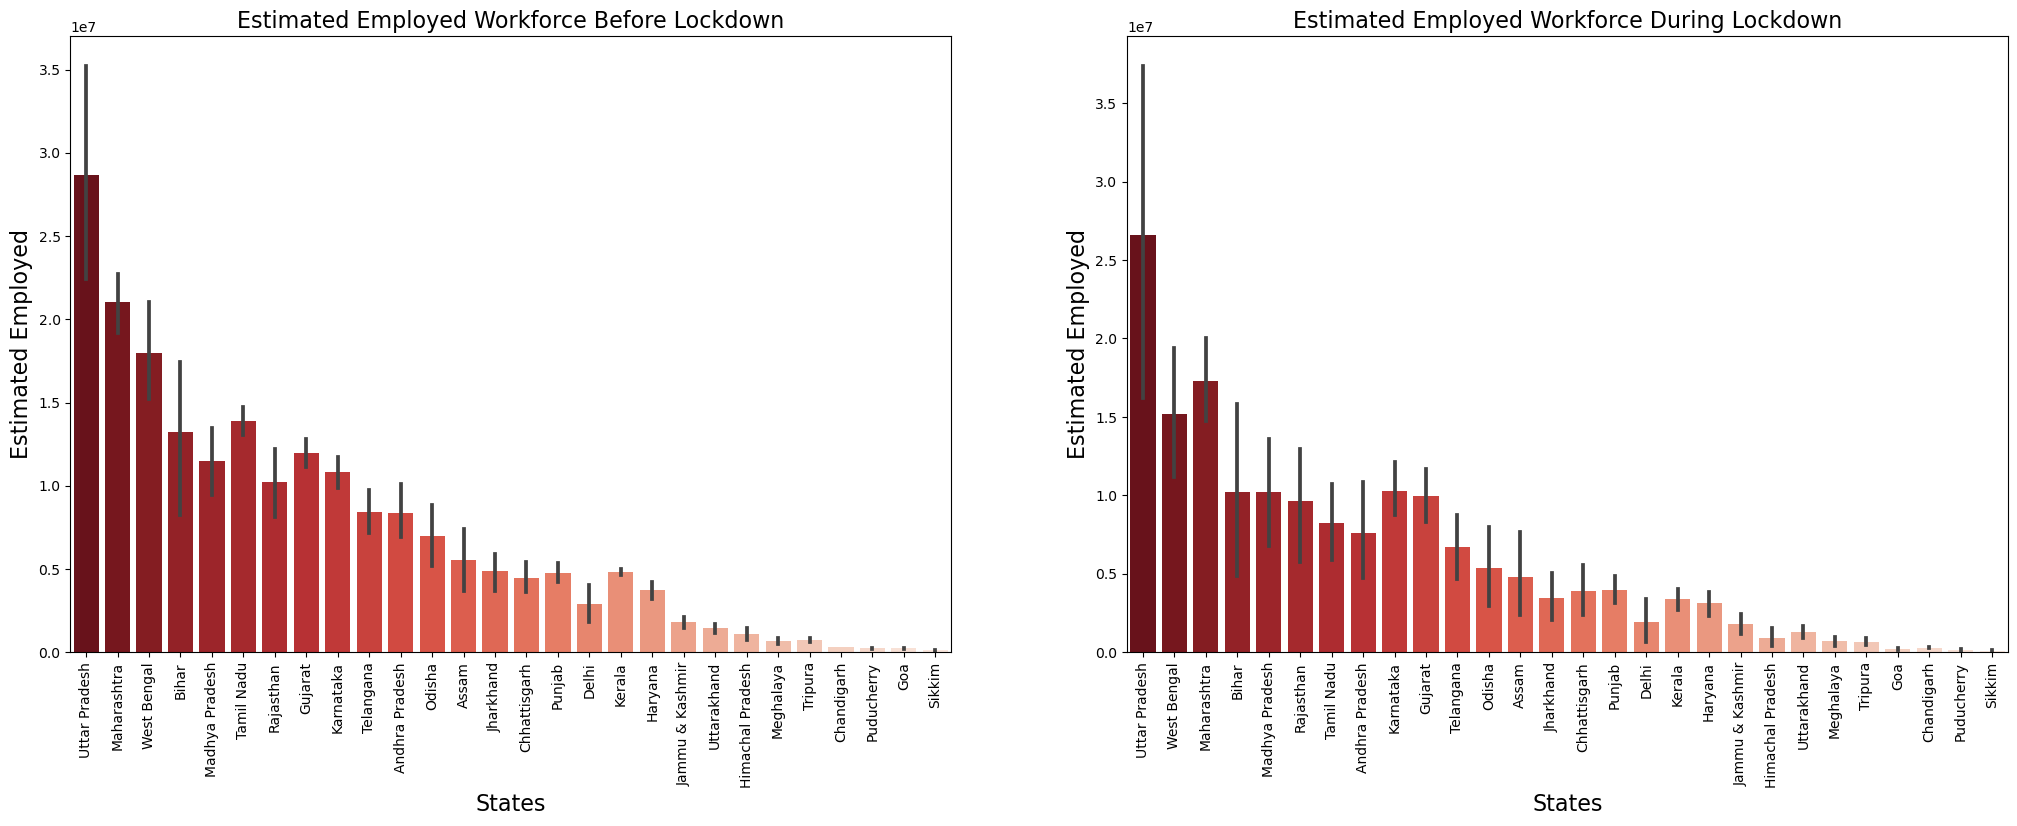

In [60]:
# Bar plot visualization for state wise Estimated Employed Workforce

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Employed Workforce Before Lockdown
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Employed Workforce Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Employed Workforce before lockdown.
sns.barplot(data=df.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed",
           palette=sns.color_palette("Reds",30)[::-1])

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the first subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)

# Subplot 2: Estimated Employed Workforce During Lockdown
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Employed Workforce During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Employed Workforce during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Employed', ascending=False), x="States", y="Estimated Employed", 
           palette=sns.color_palette("Reds",30)[::-1])

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the second subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Employed', fontsize=16)

# Display the subplots side by side.
plt.show()

**Insights:** From the above charts we can clearly observe that,
- Uttar Pradesh, Maharashtra and West Bengal are in top before lockdown time for Estimated Employed Workforce. 
- Uttar Pradesh, West Bengal and Maharashtra are again in top during the lockdown time for Estimated Employed Workforce.

### 7. Visualizing State Wise Estimated Labour Participation Rate before and during lockdown time 

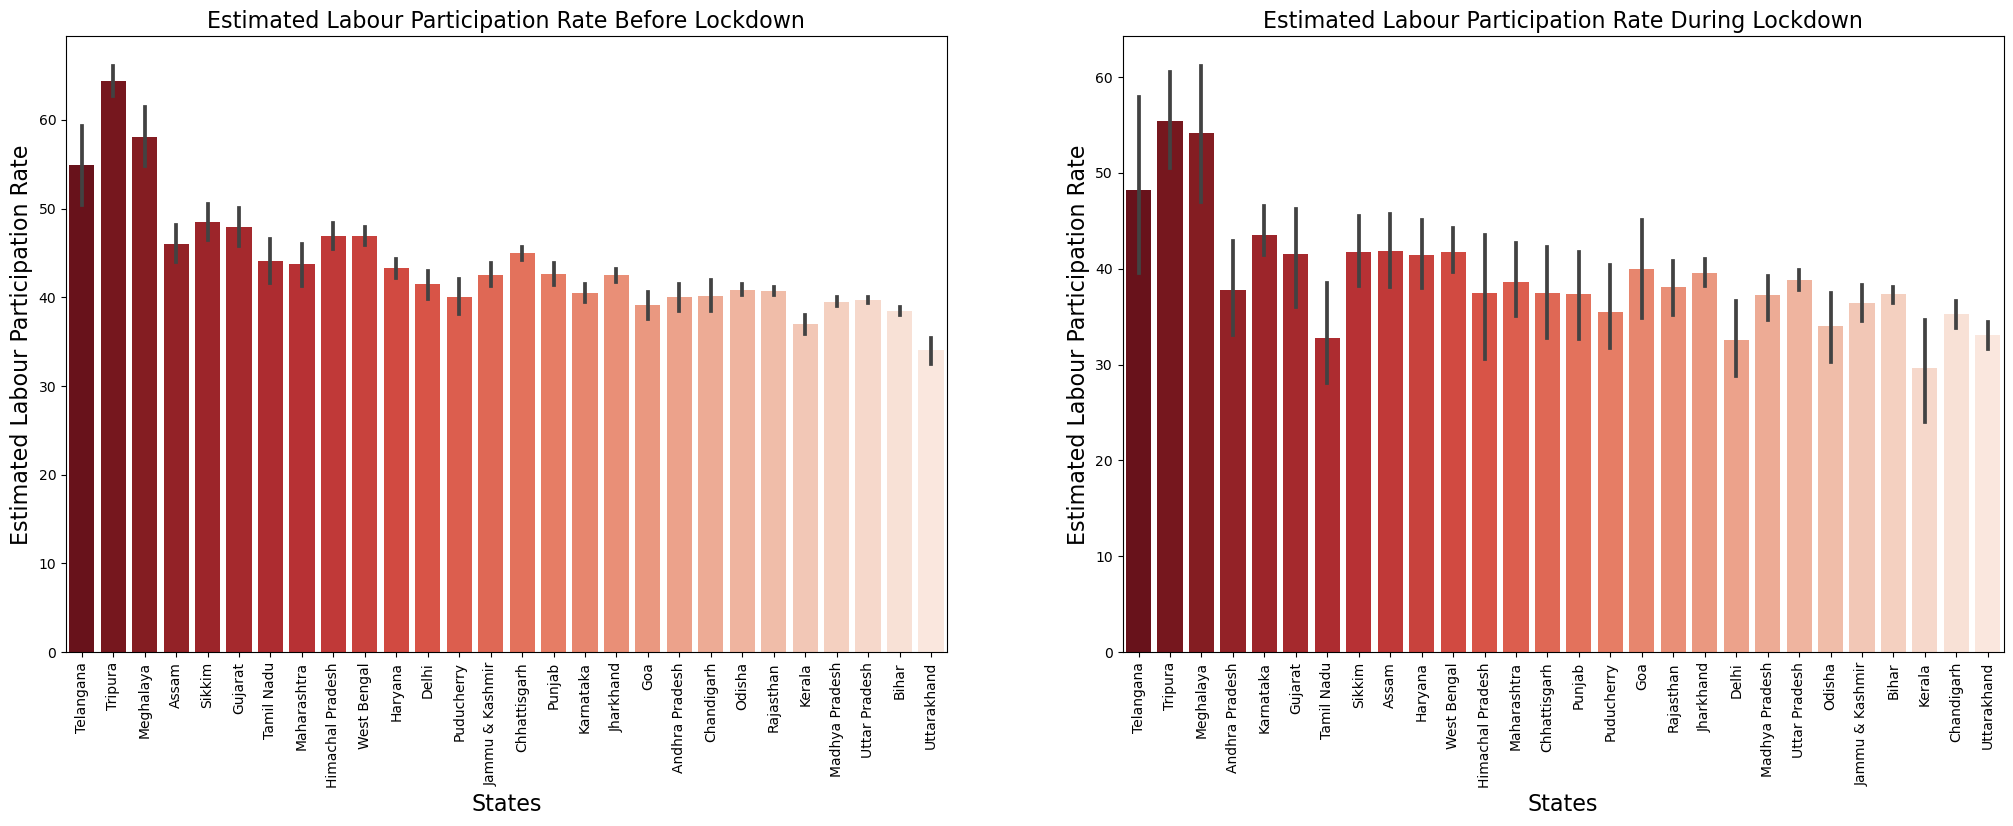

In [61]:
# Bar plot visualization for state wise Estimated Labour Participation Rate

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Estimated Labour Participation Rate Before Lockdown.
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Estimated Labour Participation Rate Before Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Labour Participation Rate before lockdown.
sns.barplot(data=df.sort_values(by='Estimated Labour Participation Rate', ascending=False), x="States", 
            y="Estimated Labour Participation Rate", palette=sns.color_palette("Reds",30)[::-1])

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the first subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)

# Subplot 2: Estimated Labour Participation Rate During Lockdown.
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Estimated Labour Participation Rate During Lockdown", fontsize=16)

# Create a bar plot to visualize the Estimated Labour Participation Rate during lockdown.
sns.barplot(data=df_ld.sort_values(by='Estimated Labour Participation Rate', ascending=False), x="States", 
            y="Estimated Labour Participation Rate", palette=sns.color_palette("Reds",30)[::-1])

# Rotate x-axis labels for better readability.
plt.xticks(rotation=90)

# Set labels for the second subplot.
plt.xlabel('States', fontsize=16)
plt.ylabel('Estimated Labour Participation Rate', fontsize=16)

# Display the subplots side by side.
plt.show()

**Insights:** From the above charts we can clearly observe that,
- Telangana, Tripura, Meghalaya and Assam are having the highest Estimated Labour Participation Rate before lockdown time. 
- Telangana, Tripura, Meghalaya and Andhra Pradesh are in top, during the lockdown time for Estimated Labour Participation Rate.

### 8. Visualizing Correlation Heatmap before and during lockdown time 

In [62]:
# Create new DataFrames
before_ld = df[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]

during_ld = df_ld[['Estimated Unemployment Rate','Estimated Employed', 'Estimated Labour Participation Rate']]

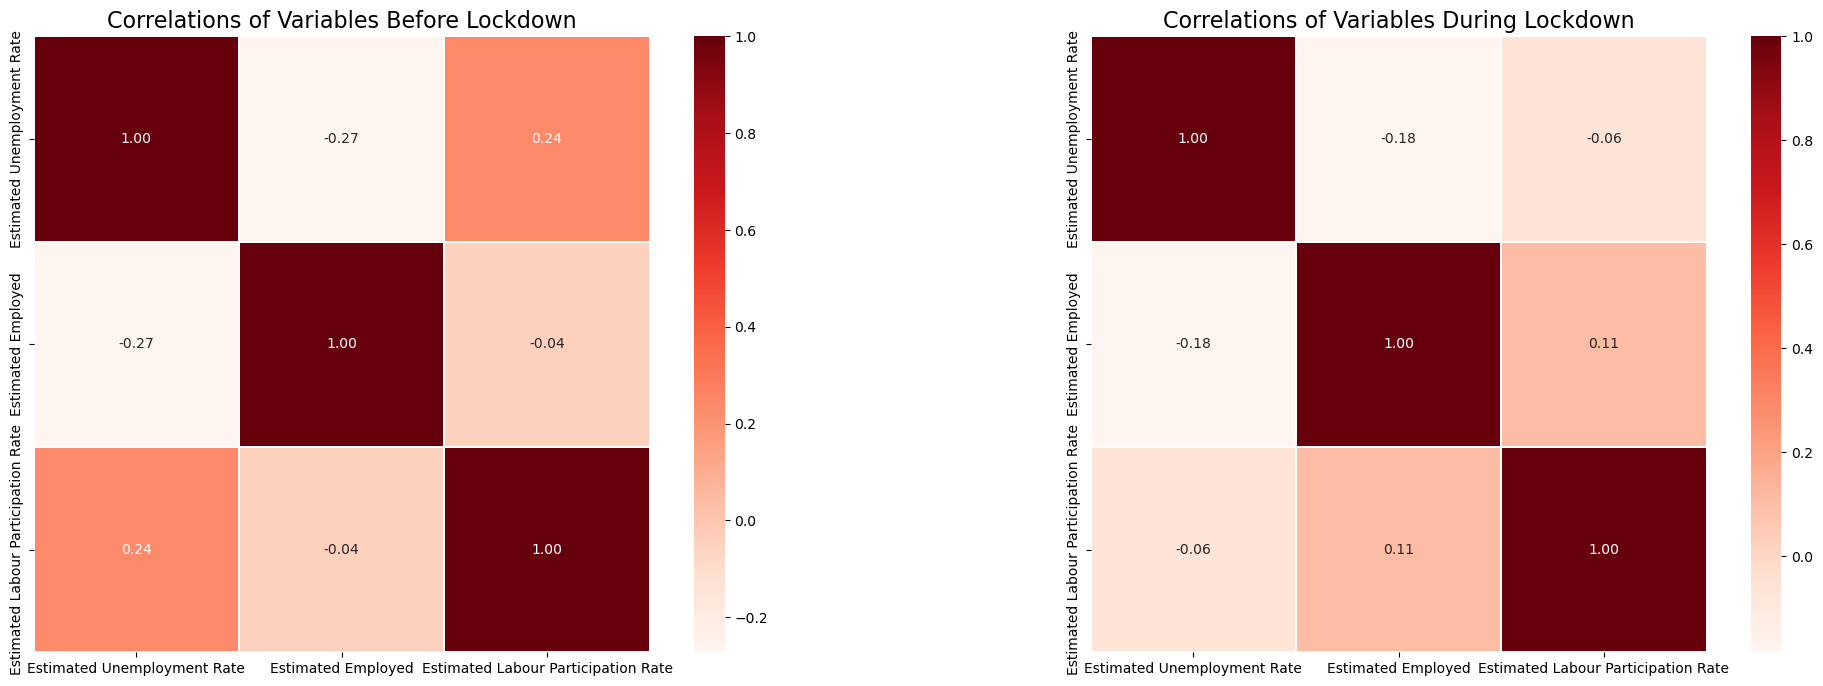

In [63]:
# Correlation heatmap visualization code

# Create a figure with two subplots side by side.
plt.figure(figsize=(25, 8))

# Subplot 1: Correlations of Variables Before Lockdown.
plt.subplot(1, 2, 1)

# Set the title for the first subplot.
plt.title("Correlations of Variables Before Lockdown", fontsize=16)

# Create a heatmap to visualize the correlations between variables in before_ld.
sns.heatmap(before_ld.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap="Reds")

# Subplot 2: Correlations of Variables During Lockdown.
plt.subplot(1, 2, 2)

# Set the title for the second subplot.
plt.title("Correlations of Variables During Lockdown", fontsize=16)

# Create a heatmap to visualize the correlations between variables in during_ld.
sns.heatmap(during_ld.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap="Reds")

# Display the subplots side by side.
plt.show()

**Insights:** From the above heatmaps we can clearly observe that, 
- Estimated Unemployment Rate and Estimated Employed have a strong negative correlation for both, before and during lockdown time.
- Estimated Employed and Estimated Labour Participation Rate have a negative correlation before the lockdown, but a positive correlation during the lockdown time.
- Estimated Unemployment Rate and Estimated Labour Participation Rate have a positive correlation before the lockdown, but a negative correlation during the lockdown time.

## Summary <a id="Summary"></a>

- First we did the Basic Understanding of the dataset.
- Then we performed few Data Preprocessing techniques to handle duplicate values and null values.
- Then we performed Data Wrangling and did all the cleaning and statistical analysis.
- Then we performed Exploratory Data Analysis to generate the insights by visualizing the data with various plots.
- After analyzing the dataset we gained some insights that may give us a brief about the effects of Covid-19 on different states of India. Firstly, the peak of the crisis in april 2020 caused a huge decrease in the labour participation rate as it had reached its lowest during that period. Secondly, from the visualizations we saw that urban areas had a higher unemployment rate than rural areas. Although there's a states like Meghalaya that had the least employees, it has the least unemployment rate too. While other states like Puducherry had been affected badly from the crisis.
- In the end we generated an insight by comparing the visualizations between before and during lockdown time that most of states were having drastic increment in Unemployment Rate during the Lockdown.

## Conclusion<a id="Conclusion"></a>

In this data science project, we embarked on a comprehensive analysis of the unemployment rate, a critical economic indicator, with a particular focus on the unprecedented challenges brought about by the Covid-19 pandemic. Our exploratory data analysis yielded valuable insights that shed light on the dynamics of unemployment in India. 

1. We observed a significant surge in the Estimated Unemployment Rate during the Covid-19 lockdown, underscoring the profound impact of the pandemic on the labor market.

2. Our state-wise analysis highlighted the states that bore the brunt of this crisis. Puducherry and Jharkhand stood out with the highest Estimated Unemployment Rates during the lockdown, while Haryana and Tripura held the top positions before the pandemic.

3. The transition from pre-lockdown to lockdown was marked by shifts in the states with the highest Estimated Unemployment Rates. Tripura, Haryana, and Himachal Pradesh led the rankings before the lockdown, whereas Puducherry, Jharkhand, and Bihar claimed the top spots during the lockdown.

4. Notably, states like Uttar Pradesh, Maharashtra, and West Bengal exhibited consistent challenges in maintaining high levels of Estimated Employed Workforce both before and during the lockdown.

5. Our analysis of Estimated Labour Participation Rate identified states that showed resilience in labor force participation. Telangana, Tripura, Meghalaya, and Assam topped the list before the lockdown, while Meghalaya, Telangana, Tripura, and Andhra Pradesh excelled during the lockdown.

6. We uncovered a robust negative correlation between Estimated Unemployment Rate and Estimated Employed, highlighting the intricate relationship between these two crucial employment indicators, both before and during the lockdown.

This project not only provided valuable insights into the economic impact of the Covid-19 pandemic but also demonstrated the power of data science in understanding and addressing complex socio-economic challenges. The findings contribute to informed decision-making and policy formulation, and underscore the importance of data-driven approaches in mitigating the effects of future crises.